# <center>**Práctica 1: Boletín de ejercicios**</center>
## <center>Procesamiento de Imagen, Vídeo y Audio</center>
### <center>Grado en Ciencia e Ingeniería de Datos</center>
### <center>Curso 2022/2023</center>

### 1. **Entrada, salida y representación de imágenes**

#### Ejercicio 1.1.- Leer y visualizar imágenes

a) Lea la imagen ’lena.png’ (Figura 1); llamémosle lena1. Escriba por pantalla su
tamaño (shape), sus valores mínimo y máximo, y su tipo. Visualice la imagen.

Tamaño de la imagen lena: (512, 512, 3)
Valor mínimo de lena: 3
Valor máximo de lena: 255
Tipo: uint8


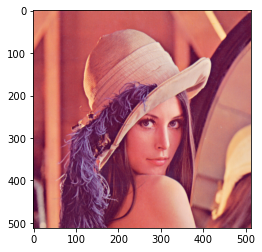

In [1]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt

lena1 = io.imread("lena.png")

shape= lena1.shape
print("Tamaño de la imagen lena:", shape)
print("Valor mínimo de lena:", np.min(lena1))
print("Valor máximo de lena:", np.max(lena1))
print("Tipo:", lena1.dtype)

plt.imshow(lena1)

b) Lea la imagen ’lena.png’, usando el parámetro ‘as gray=True’; llamémosle
lena2. Escriba por pantalla su tamaño, sus valores mínimo y máximo, y su
tipo. Visualice la imagen, consiguiendo que se vea en escala de grises.

Tamaño de la imagen lena2: (512, 512)
Valor mínimo de lena2: 0.07254666666666668
Valor máximo de lena2: 0.9654356862745097
Tipo: float64


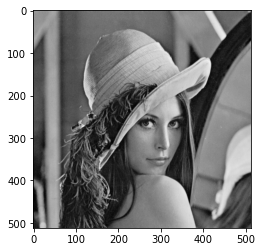

In [2]:
lena2 = io.imread("lena.png", as_gray = True)

print("Tamaño de la imagen lena2:", lena2.shape)
print("Valor mínimo de lena2:", np.min(lena2))
print("Valor máximo de lena2:", np.max(lena2))
print("Tipo:", lena2.dtype)

plt.imshow(lena2, cmap='gray')
plt.show()

c) Divida el valor de la imagen lena2 por 2 y súmele 0,25; llamémosle lena3
al resultado. Escriba por pantalla sus valores mínimo y máximo. Visualice en
subfiguras anexas lena2 y lena3, usando escala de grises, y consiguiendo que
las diferencias de brillo sean apreciables visualmente.

Valor mínimo de lena3: 0.2862733333333333
Valor máximo de lena3: 0.7327178431372549


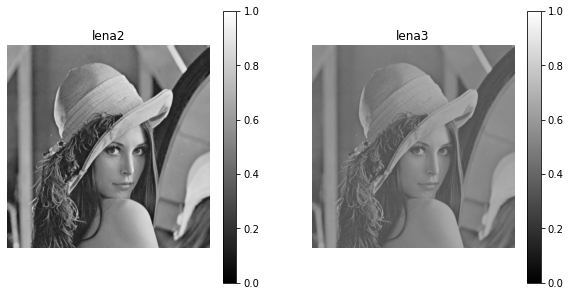

In [3]:
lena3 = lena2 / 2 + 0.25

print('Valor mínimo de lena3:', np.min(lena3))
print('Valor máximo de lena3:', np.max(lena3))

# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostramos lena2 en el primer subplot
im1 = axs[0].imshow(lena2, cmap='gray', vmin=0, vmax=1)
axs[0].set_title('lena2')
axs[0].axis('off')
plt.colorbar(im1, ax=axs[0])

# Mostramos lena3 en el segundo subplot
im2 = axs[1].imshow(lena3, cmap='gray', vmin=0, vmax=1)
axs[1].set_title('lena3')
axs[1].axis('off')
plt.colorbar(im2, ax=axs[1])

# Mostrar la figura
plt.show()

#### Ejercicio 1.2.- Escribir imágenes en disco
a) Guarde las imágenes lena2 y lena3 del Ejercicio 1.1, en los ficheros lena2.png
y lena3.png, respectivamente, de la carpeta resultados. Asegúrese de que
la diferencia de intesidades es apreciable en las imágenes guardadas (con un
visor externo, o volviendolas a leer)

In [4]:
# Guardamos lena2 en lena2.png
io.imsave('resultados/lena2.png', lena2)

# Guardamos lena3 en lena3.png
io.imsave('resultados/lena3.png', lena3)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Visualizando las imágenes con un visor externo comprobamos que la diferencia de intensidades se aprecia perfectamente.

b) Repita la operación anterior, pero multiplicando antes las imágenes por 10,
y almacenando los resultados en lena2b.png y lena3b.png, respectivamente.
¿Qué ocurre y por qué? ¿Cómo debemos hacer para que las diferencias en las
imágenes se puedan almacenar?

In [5]:
# Multiplicamos lena2 por 10 y la guardamos en lena2b.png
lena2b = 10 * lena2
plt.imsave('resultados/lena2b.png', lena2b, cmap='gray')

# Multiplicamos lena3 por 10 y la guardamos en lena3b.png
lena3b = 10 * lena3 
plt.imsave('resultados/lena3b.png', lena3b, cmap='gray')

Lo que ocurre en este caso es que no se aprecian las diferencias de intensidad, pues al guardar las imágenes en formato PNG se convierten los valores de intensidad a valores enteros de 8 bits, de 0 a 255, lo que puede provocar una pérdida de precisión. 
Para que las diferencias en las imágenes se puedan almacenar debemos guardar las imágenes en un formato de punto flotante, como JPEG.
############################################################################################################## CORREGIR ############################################

In [6]:
# Multiplicamos lena2 por 10 y la guardamos en lena2b.png
# lena2b = 10 * lena2.astype(np.uint8)
plt.imsave('resultados/lena2b_fixed.png', lena2b, vmin=-128, vmax=127, cmap='gray')

# Multiplicamos lena3 por 10 y la guardamos en lena3b.png
# lena3b = 10 * lena3.astype(np.uint8)
plt.imsave('resultados/lena3b_fixed.png', lena3b, vmin=-128, vmax=127, cmap='gray')

#### Ejercicio 1.3.- Enteros, Flotantes y Booleanos

a) Cree tres imágenes de degradado, de tamañoo 100 × 100, y:  
A: tipo np.float64, y valores de 0.1 a 0.9.  
B: tipo np.uint8, y valores de 25 a 230.  
C: tipo np.int32, y valores de -230 a 230.

In [7]:
def intensity_gradient(size=(100, 100), dtype=np.uint8, values=(0, 255)):
    rows, cols = size
    mn, mx = values
    result = np.linspace(mn, mx, rows*cols).reshape(rows, cols)
    return result.astype(dtype)

image1 = intensity_gradient(dtype=np.float64, values=(0.1, 0.9))
image2 = intensity_gradient(dtype=np.uint8, values=(25, 230))
image3 = intensity_gradient(dtype=np.int32, values=(-230, 230))

b) Visualice las tres imágenes, en escala de grises y sin normalizar, y reporte su
valor mínimo y máximo.

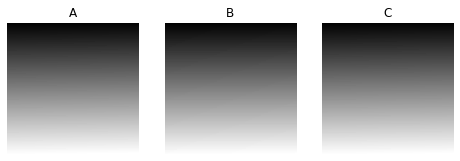

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

img1 = axs[0].imshow(image1, cmap='gray')
axs[0].set_title('A')
axs[0].axis('off')
#plt.colorbar(image1, ax=axs[0])

img2 = axs[1].imshow(image2, cmap='gray')
axs[1].set_title('B')
axs[1].axis('off')
#plt.colorbar(image2, ax=axs[1])

img3 = axs[2].imshow(image3, cmap='gray')
axs[2].set_title('C')
axs[2].axis('off')
#plt.colorbar(image3, ax=axs[2])

plt.show()

In [9]:
print(f"Valores mínimo y máximo de la imagen 1: {np.min(image1)}, {np.max(image1)}")
print(f"Valores mínimo y máximo de la imagen 2: {np.min(image2)}, {np.max(image2)}")
print(f"Valores mínimo y máximo de la imagen 3: {np.min(image3)}, {np.max(image3)}")

Valores mínimo y máximo de la imagen 1: 0.1, 0.9
Valores mínimo y máximo de la imagen 2: 25, 230
Valores mínimo y máximo de la imagen 3: -230, 230


c) Explore el resultado de las funciones *img as float*, *img as unit8*, *img as int*
e *img as bool* de *skimage* sobre las tres imágenes anteriores, así como la salida
de la función *skimage.dtype_limits* aplicada sobre las imágenes de entrada
y salida. Explique lo que ocurre.

In [10]:
from skimage.util import img_as_float, img_as_uint, img_as_int, img_as_bool, dtype_limits

image1_float = img_as_float(image1)
image1_uint8 = img_as_uint(image1)
image1_int = img_as_int(image1)
image1_bool = img_as_bool(image1)

print(f"Límites de la imagen 1 float: {dtype_limits(image1_float)}")
print(f"Límites de la imagen 1 uint8: {dtype_limits(image1_uint8)}")
print(f"Límites de la imagen 1 int: {dtype_limits(image1_int)}")
print(f"Límites de la imagen 1 bool: {dtype_limits(image1_bool)}")

image2_float = img_as_float(image2)
image2_uint8 = img_as_uint(image2)
image2_int = img_as_int(image2)
image2_bool = img_as_bool(image2)

print(f"\nLímites de la imagen 2 float: {dtype_limits(image2_float)}")
print(f"Límites de la imagen 2 uint8: {dtype_limits(image2_uint8)}")
print(f"Límites de la imagen 2 int: {dtype_limits(image2_int)}")
print(f"Límites de la imagen 2 bool: {dtype_limits(image2_bool)}")

image3_float = img_as_float(image3)
image3_uint8 = img_as_uint(image3)
image3_int = img_as_int(image3)
image3_bool = img_as_bool(image3)

print(f"\nLímites de la imagen 3 float: {dtype_limits(image3_float)}")
print(f"Límites de la imagen 3 uint8: {dtype_limits(image3_uint8)}")
print(f"Límites de la imagen 3 int: {dtype_limits(image3_int)}")
print(f"Límites de la imagen 3 bool: {dtype_limits(image3_bool)}")

Límites de la imagen 1 float: (-1, 1)
Límites de la imagen 1 uint8: (0, 65535)
Límites de la imagen 1 int: (-32768, 32767)
Límites de la imagen 1 bool: (False, True)

Límites de la imagen 2 float: (-1, 1)
Límites de la imagen 2 uint8: (0, 65535)
Límites de la imagen 2 int: (-32768, 32767)
Límites de la imagen 2 bool: (False, True)

Límites de la imagen 3 float: (-1, 1)
Límites de la imagen 3 uint8: (0, 65535)
Límites de la imagen 3 int: (-32768, 32767)
Límites de la imagen 3 bool: (False, True)


c:\Users\Administrador\anaconda3\lib\site-packages\skimage\util\dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 230 fits in uint16
  return _convert(image, np.uint16, force_copy)
c:\Users\Administrador\anaconda3\lib\site-packages\skimage\util\dtype.py:517: UserWarning: Downcasting int32 to int16 without scaling because max value 230 fits in int16
  return _convert(image, np.int16, force_copy)


Como podemos observar, la conversión a *float* normaliza los valores entre [-1,1]. En la conversión a *uint8* los valores de entrada negativos se recortan, y los positivos se escalan entre 0 y 65535. En la conversión a *int* los valores están escalados entre -32768 y 32767, y si el tipo de datos de entrada es solo positivo (por ejemplo, uint8), la imagen de salida solo tendrá valores positivos. En la conversión a *bool* la mitad superior del rango positivo de entrada es True y la mitad inferior es False, y todos los valores negativos son falsos.

#### Ejercicio 1.4.- Indexación
Considerando las imágenes *data.brick()* y *data.astronaut()*, convertidas a
números flotantes en un rango apropiado:  
  
a) Sobre una copia de brick, asigne un valor de intensidad ”blanco puro”, a la
ventana definida por las filas 100 a 150, y las columnas 20 a 120. Visualice el
resultado, su valor máximo, su valor mínimo y el tipo.

Máximo: 1.0
Mínimo: 0.24705882352941178
Tipo: float64


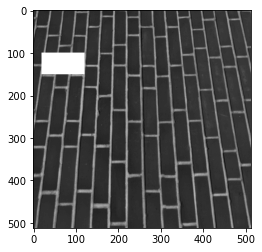

In [11]:
from skimage import data

brick = data.brick()
astronaut = data.astronaut()

brick_float = img_as_float(brick)

brick_copy = brick_float.copy()

# Asignamos el valor 1.0 (correspondiente al "blanco puro" a la ventana definida por las filas 100 a 150
# y las columnas 20 a 120)
brick_copy[100:151, 20:121] = 1.0

plt.imshow(brick_copy, cmap='gray')

max_value = np.max(brick_copy)
min_value = np.min(brick_copy)
data_type = brick_copy.dtype

print(f"Máximo: {max_value}")
print(f"Mínimo: {min_value}")
print(f"Tipo: {data_type}")

b) Cree una máscara binaria (llamémosle *brickmsk*) que valga 1 en las posiciones
donde brick sea mayor que el 50 % del rango dinámico y 0 en el resto. Visualice
el resultado, así como su valor máximo, su valor mínimo y el tipo.

Máximo de la máscara binaria: 1
Mínimo de la máscara binaria: 0
Tipo de la máscara binaria: uint8


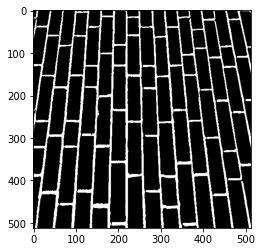

In [12]:
# Calculamos el rango dinámico de la imagen brick
dynamic_range = np.max(brick) - np.min(brick)

# Calculamos el umbral para crear la máscara
threshold = (0.5 * dynamic_range) + np.min(brick)

# Creamos la máscara binaria 
brickmsk = np.zeros_like(brick)
brickmsk[brick > threshold] = 1

plt.imshow(brickmsk, cmap='gray')

max_value = np.max(brickmsk)
min_value = np.min(brickmsk)
data_type = brickmsk.dtype

# Imprimir los resultados obtenidos
print(f"Máximo de la máscara binaria: {max_value}")
print(f"Mínimo de la máscara binaria: {min_value}")
print(f"Tipo de la máscara binaria: {data_type}")

c) Modifique los valores de una copia de *astronaut* para que tomen un valor [r,g,b]
aleatorio en las posiciones indicadas por la máscara *brickmsk*

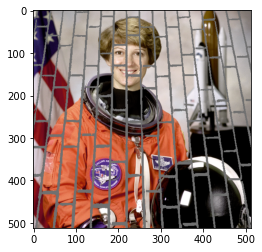

In [13]:
astronaut_copy = astronaut.copy()

astronaut_copy[brickmsk == 1] = np.random.randint(0, 256)
plt.imshow(astronaut_copy)

d) Usando una copia de *astronaut*, visualice, en cuatro subfiguras, cada uno de
sus canales RGB, en escala de grises, junto con la imagen en color.

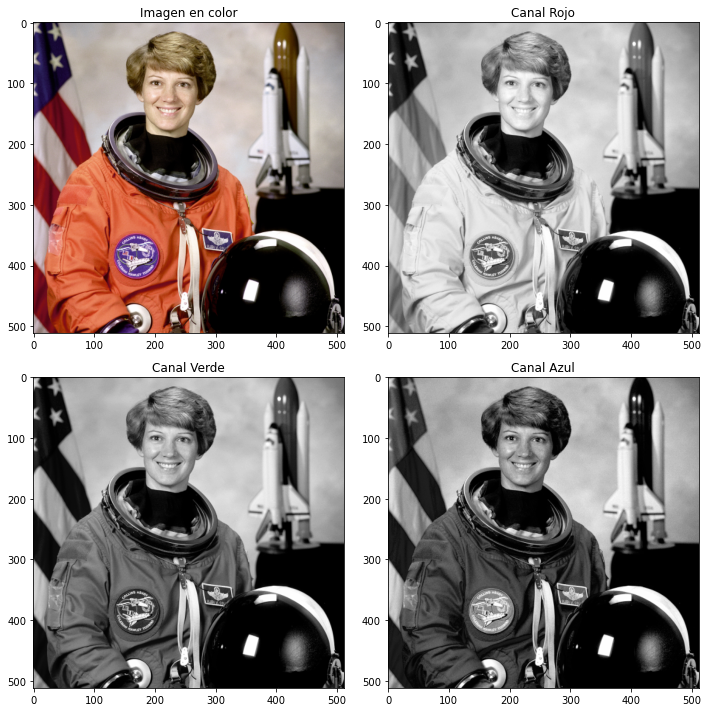

In [14]:
astronaut_copy_2 = astronaut.copy()
# Dividimos la copia en sus tres canales RGB
red = astronaut_copy_2[:, :, 0]
green = astronaut_copy_2[:, :, 1]
blue = astronaut_copy_2[:, :, 2]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Imagen a color
axs[0, 0].imshow(astronaut_copy_2)
axs[0, 0].set_title('Imagen en color')

# Canal rojo
axs[0, 1].imshow(red, cmap='gray')
axs[0, 1].set_title('Canal Rojo')

# Canal verde
axs[1, 0].imshow(green, cmap='gray')
axs[1, 0].set_title('Canal Verde')

# Canal azul
axs[1, 1].imshow(blue, cmap='gray')
axs[1, 1].set_title('Canal Azul')

# Ajustar los espacios entre subfiguras y mostrar la figura
plt.tight_layout()
plt.show()


e) Usando la función *skimage.draw.disk*, obtenga las coordenadas de un círculo
en una posición aleatoria del espacio 512×512, y radio 20. Modifique la imagen
resultante del apartado (c) para que los valores del canal verde en las posiciones
del círculo sean 100 % del rango dinámico, dejando el resto de valores sin
cambiar. Visualize el resultado.

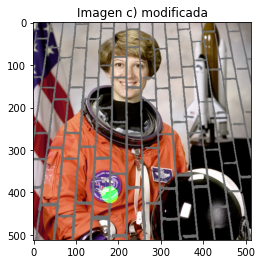

In [15]:
from skimage import draw

x, y = draw.disk(center=(np.random.randint(20, 492), np.random.randint(20, 492)), radius=20, shape=(512, 512))
# las coordenadas del centro del círculo son un número aleatorio entre 20 y 492, ya que el radio es 20 (0+20, 512-20)

astronaut_copy[x, y, 1] = np.max(astronaut_copy)

plt.imshow(astronaut_copy)
plt.title('Imagen c) modificada')
plt.show()

### 2. **Transformación del espacio de color**

#### Ejercicio 2.1.- Espacios de color

a) Muestre en una cuadrícula de 3 × 3 de subfiguras: los tres canales de RGB en
escala de grises, los tres canales de CITE-L*a*b* en escala de grises, y los tres
canales de HSV en escala de grises. Use los títulos de las figuras para indicar
el nombre del canal y su rango de valores.

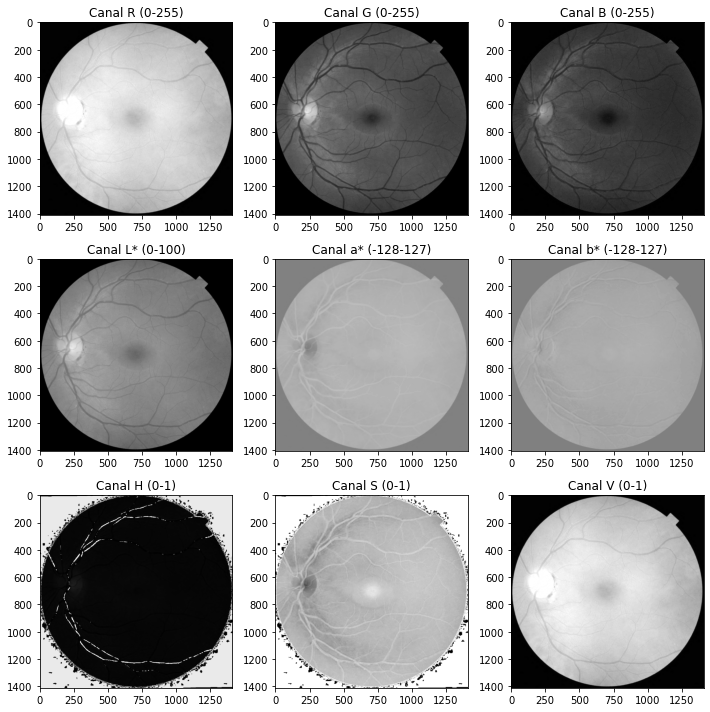

In [16]:
from skimage import io, color

# Cargar las imágenes
retina = data.retina()

# Convertimos la imagen retina a diferentes espacios de color
retina_lab = color.rgb2lab(retina)
retina_hsv = color.rgb2hsv(retina)

# Obtenemos los canales de la imagen en escala de grises
retina_r = retina[:,:,0]
retina_g = retina[:,:,1]
retina_b = retina[:,:,2]
retina_l = retina_lab[:,:,0]
retina_a = retina_lab[:,:,1]
retina_b_lab = retina_lab[:,:,2]
retina_h = retina_hsv[:,:,0]
retina_s = retina_hsv[:,:,1]
retina_v = retina_hsv[:,:,2]

# Creamos la cuadrícula de subfiguras
fig, axs = plt.subplots(3, 3, figsize=(10,10))

# Mostramos los canales de la imagen en escala de grises
axs[0,0].imshow(retina_r, cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title('Canal R (0-255)')

axs[0,1].imshow(retina_g, cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title('Canal G (0-255)')

axs[0,2].imshow(retina_b, cmap='gray', vmin=0, vmax=255)
axs[0,2].set_title('Canal B (0-255)')

axs[1,0].imshow(retina_l, cmap='gray', vmin=0, vmax=100)
axs[1,0].set_title('Canal L* (0-100)')

axs[1,1].imshow(retina_a, cmap='gray', vmin=-128, vmax=127)
axs[1,1].set_title('Canal a* (-128-127)')

axs[1,2].imshow(retina_b_lab, cmap='gray', vmin=-128, vmax=127)
axs[1,2].set_title('Canal b* (-128-127)')

axs[2,0].imshow(retina_h, cmap='gray', vmin=0, vmax=1)
axs[2,0].set_title('Canal H (0-1)')

axs[2,1].imshow(retina_s, cmap='gray', vmin=0, vmax=1)
axs[2,1].set_title('Canal S (0-1)')

axs[2,2].imshow(retina_v, cmap='gray', vmin=0, vmax=1)
axs[2,2].set_title('Canal V (0-1)')


fig.tight_layout()
plt.show()

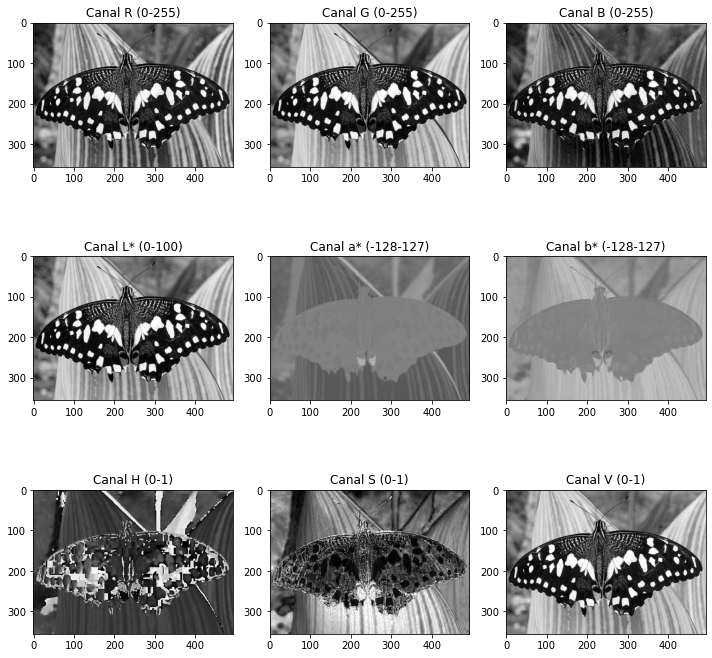

In [17]:
butterfly = io.imread('butterfly.jpg')

# Convertimos la imagen a diferentes espacios de color
butterfly_lab = color.rgb2lab(butterfly)
butterfly_hsv = color.rgb2hsv(butterfly)

# Obtenemos los canales de la imagen en escala de grises
butterfly_r = butterfly[:,:,0]
butterfly_g = butterfly[:,:,1]
butterfly_b = butterfly[:,:,2]
butterfly_l = butterfly_lab[:,:,0]
butterfly_a = butterfly_lab[:,:,1]
butterfly_b_lab = butterfly_lab[:,:,2]
butterfly_h = butterfly_hsv[:,:,0]
butterfly_s = butterfly_hsv[:,:,1]
butterfly_v = butterfly_hsv[:,:,2]

# Creamos la cuadrícula de subfiguras
fig, axs = plt.subplots(3, 3, figsize=(10,10))

# Mostramos los canales de la imagen en escala de grises
axs[0,0].imshow(butterfly_r, cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title('Canal R (0-255)')

axs[0,1].imshow(butterfly_g, cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title('Canal G (0-255)')

axs[0,2].imshow(butterfly_b, cmap='gray', vmin=0, vmax=255)
axs[0,2].set_title('Canal B (0-255)')

axs[1,0].imshow(butterfly_l, cmap='gray', vmin=0, vmax=100)
axs[1,0].set_title('Canal L* (0-100)')

axs[1,1].imshow(butterfly_a, cmap='gray', vmin=-128, vmax=127)
axs[1,1].set_title('Canal a* (-128-127)')

axs[1,2].imshow(butterfly_b_lab, cmap='gray', vmin=-128, vmax=127)
axs[1,2].set_title('Canal b* (-128-127)')

axs[2,0].imshow(butterfly_h, cmap='gray', vmin=0, vmax=1)
axs[2,0].set_title('Canal H (0-1)')

axs[2,1].imshow(butterfly_s, cmap='gray', vmin=0, vmax=1)
axs[2,1].set_title('Canal S (0-1)')

axs[2,2].imshow(butterfly_v, cmap='gray', vmin=0, vmax=1)
axs[2,2].set_title('Canal V (0-1)')


fig.tight_layout()
plt.show()

b) Observando los resultados: ¿Qué canal es más apropiado para la segmentación
objetivo? Razone la respuesta.

#### Ejercicio 2.2.- Canal de color arbitrario

a) Haga una función *rand_channel* que, tomando como entrada una imagen de
tres canales, obtenga como salida una imagen de un solo canal que resulta de
la combinación lineal aleatoria de los tres canales.  
Es decir, si la imagen de entrada *I* es una matriz N × M × 3, y W es un vector
de 3 pesos aleatorios tal que Wi = 1, lo que buscamos es la matriz de salida
O, de N × M elementos, que resulta de hacer producto escalar entre I y W a
lo largo de la tercera dimensión de I (e.g. con np.dot o np.matmul).

In [18]:
def random_lc_channel(I):
    height, width, channels = I.shape

    W = np.random.rand(channels)
    W /= W.sum() # normalizamos los pesos para que sumen 1
    # Calculamos la imagen de salida como una combinación lineal de los canales
    O = np.dot(I.reshape(-1, channels), W).reshape(height, width)

    return O


b) Utilice la función rand channel para visualizar 6 canales aleatorios, usando
como entrada las imágenes del Ejercicio 2.1.
¿Es alguno de estos canales aleatorios ”mejor”que cualquiera de los espacios
de color del Ejercicio 2.1 para alguno de los casos? Razone la respuesta.

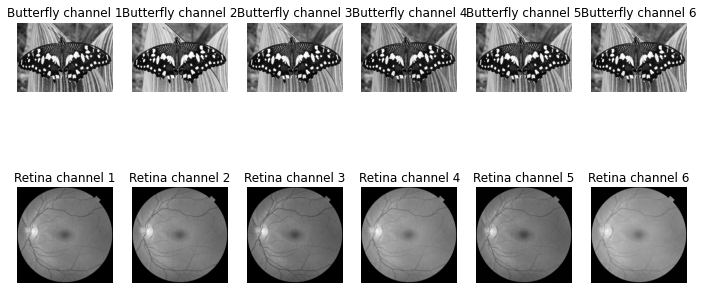

In [19]:
# generamos 6 canales aleatorios para cada imagen
butterfly_channels = [random_lc_channel(butterfly) for i in range(6)]
retina_channels = [random_lc_channel(retina) for i in range(6)]

# Mostramos los canales aleatorios
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,6,i+1)
    plt.imshow(butterfly_channels[i], cmap='gray')
    plt.axis('off')
    plt.title("Butterfly channel {}".format(i+1))
    
    plt.subplot(2,6,i+7)
    plt.imshow(retina_channels[i], cmap='gray')
    plt.axis('off')
    plt.title("Retina channel {}".format(i+1))

plt.show()



### **3. Histogramas y ajustes de luminosidad y contraste**

#### Ejercicio 3.1.- Ajuste de contraste global

Considerando las imagenes *data.text()* y *data.page()*, represéntelas en escala de
gris junto con su histograma. Compare los resultados de las siguientes técnicas de
ajuste de contraste global. Visualice los resultados, junto con sus histogramas.  

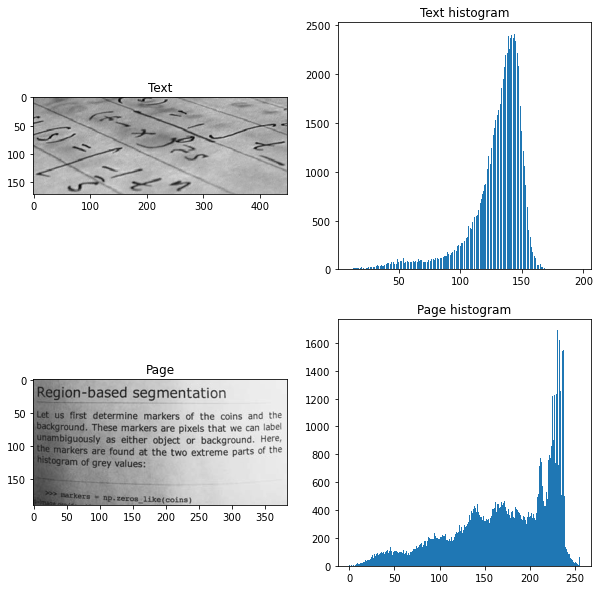

In [20]:
from skimage import exposure

text = data.text()
page = data.page()

# Representamos las imagenes en escala de gris y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(text, cmap='gray')
ax[0, 0].set_title('Text')

ax[0, 1].hist(text.ravel(), bins=256)
ax[0, 1].set_title('Text histogram')

ax[1, 0].imshow(page, cmap='gray')
ax[1, 0].set_title('Page')

ax[1, 1].hist(page.ravel(), bins=256)
ax[1, 1].set_title('Page histogram')

plt.show()


a) **Modificación lineal del rango dinámico**. Usando la función
rescale intensity, y expandiendo el histograma para que ocupe todo
el rango dinámico disponible.

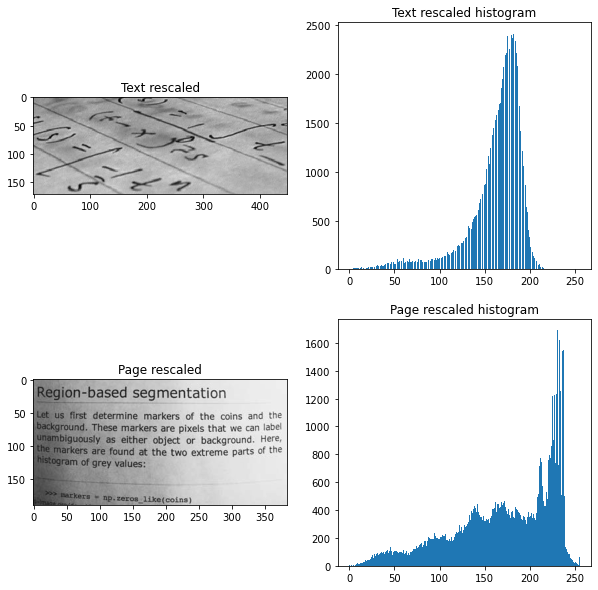

In [21]:
text_rescaled = exposure.rescale_intensity(text)
page_rescaled = exposure.rescale_intensity(page)

# Visualizamos las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(text_rescaled, cmap='gray')
ax[0, 0].set_title('Text rescaled')

ax[0, 1].hist(text_rescaled.ravel(), bins=256)
ax[0, 1].set_title('Text rescaled histogram')

ax[1, 0].imshow(page_rescaled, cmap='gray')
ax[1, 0].set_title('Page rescaled')

ax[1, 1].hist(page_rescaled.ravel(), bins=256)
ax[1, 1].set_title('Page rescaled histogram')

plt.show()

b) **Window level contrast enhancement**. Usando la función
*rescale intensity*, y seleccionando un rango de entrada a mano que
permita maximizar el contraste entre texto y fondo.

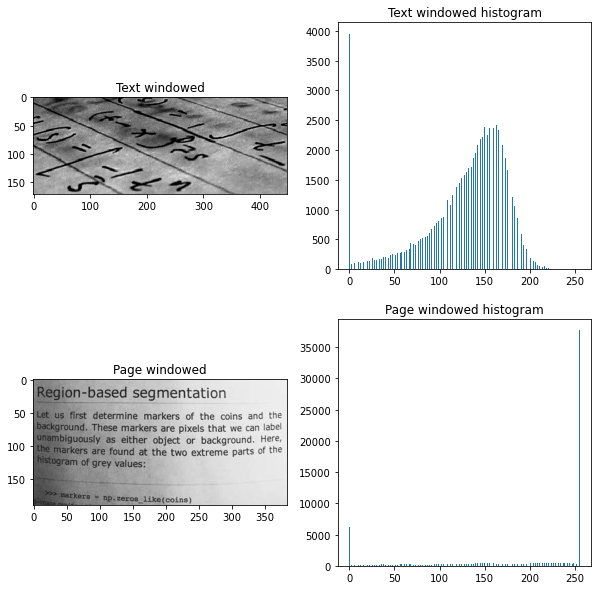

In [22]:
# Seleccionamos el rango de entrada manualmente para maximizar el contraste entre texto y fondo
vmin = 80
vmax = 180

# Aplicamos window level contrast
text_window = exposure.rescale_intensity(text, in_range=(vmin, vmax))
page_window = exposure.rescale_intensity(page, in_range=(vmin, vmax))

# Visualizamos las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(text_window, cmap='gray')
ax[0, 0].set_title('Text windowed')

ax[0, 1].hist(text_window.ravel(), bins=256)
ax[0, 1].set_title('Text windowed histogram')

ax[1, 0].imshow(page_rescaled, cmap='gray')
ax[1, 0].set_title('Page windowed')

ax[1, 1].hist(page_window.ravel(), bins=256)
ax[1, 1].set_title('Page windowed histogram')

plt.show()


c) **Ajuste Gamma**. Usando la función *adjust gamma*, y seleccionando un valor
de gamma apropiado que maximice el contraste entre texto y fondo.

Text(0.5, 1.0, 'Page gamma histogram')

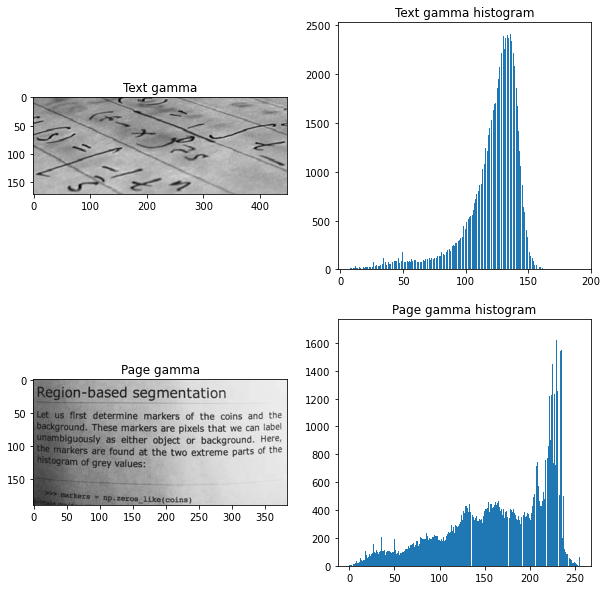

In [23]:
# Seleccionamos un valor gamma apropiado
gamma = 1.1
# Un valor gamma mayor que 1 aumenta el contraste de las zonas oscuras

# Aplicamos el ajuste gamma en las imágenes 
text_gamma = exposure.adjust_gamma(text, gamma=gamma)
page_gamma = exposure.adjust_gamma(page, gamma=gamma)

# Visualizamos las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(text_gamma, cmap='gray')
ax[0, 0].set_title('Text gamma')

ax[0, 1].hist(text_gamma.ravel(), bins=256)
ax[0, 1].set_title('Text gamma histogram')

ax[1, 0].imshow(page_gamma, cmap='gray')
ax[1, 0].set_title('Page gamma')

ax[1, 1].hist(page_gamma.ravel(), bins=256)
ax[1, 1].set_title('Page gamma histogram')

d) **Ajuste logarítmico**. Usando la función *adjust log*, y seleccionando unos
parámetros que maximicen el contraste entre texto y fondo.

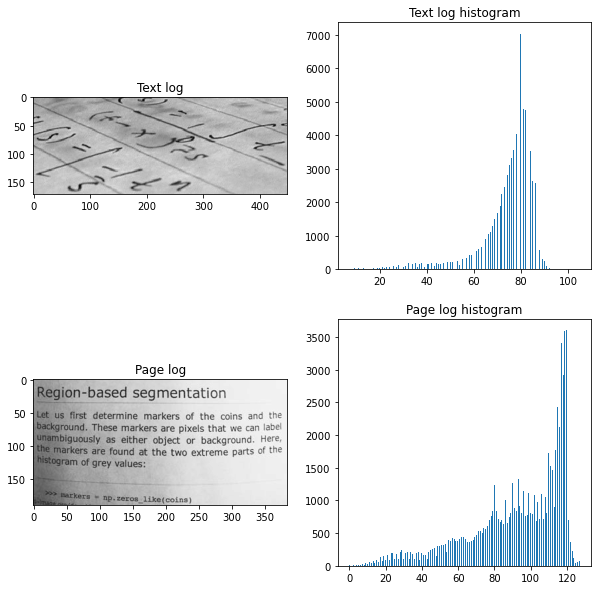

In [24]:
gain = 0.5

# Aplicamos el ajuste logarítmico en las imágenes
text_log = exposure.adjust_log(text, gain=gain)
page_log = exposure.adjust_log(page, gain=gain)

# Visualizamos las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(text_log, cmap='gray')
ax[0, 0].set_title('Text log')

ax[0, 1].hist(text_log.ravel(), bins=256)
ax[0, 1].set_title('Text log histogram')

ax[1, 0].imshow(page_log, cmap='gray')
ax[1, 0].set_title('Page log')

ax[1, 1].hist(page_log.ravel(), bins=256)
ax[1, 1].set_title('Page log histogram')

plt.show()

e) **Ecualización de histograma**. Usando la función *equalize hist*.

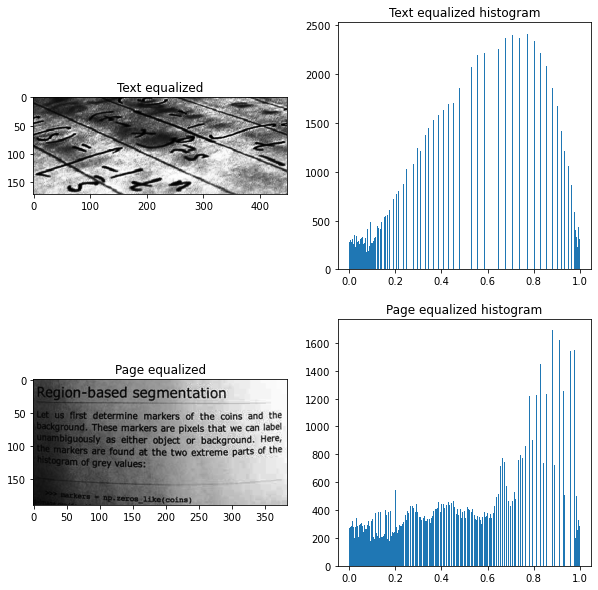

In [25]:
# Aplicamos la ecualización de histograma en las imágenes
text_eq = exposure.equalize_hist(text)
page_eq = exposure.equalize_hist(page)

# Visualizamos las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(text_eq, cmap='gray')
ax[0, 0].set_title('Text equalized')

ax[0, 1].hist(text_eq.ravel(), bins=256)
ax[0, 1].set_title('Text equalized histogram')

ax[1, 0].imshow(page_eq, cmap='gray')
ax[1, 0].set_title('Page equalized')

ax[1, 1].hist(page_eq.ravel(), bins=256)
ax[1, 1].set_title('Page equalized histogram')

plt.show()

Discuta los beneficios o inconvenientes de cada una de las técnicas.

Ejercicio 3.2.- Ajuste de contraste adaptativo

Considerando las imagenes *data.text()* y *data.page()*, represéntelas en escala de
gris junto con su histograma. Compare los resultados de las siguientes técnicas de
ajuste de contraste local. Visualice los resultados, junto con su histograma

a) **Ecualización adaptativa de histograma**. Usando la función
*equalize adapthist*. Explore el efecto del parámetro *kernel_size*. ¿Cómo
influye en el resultado?

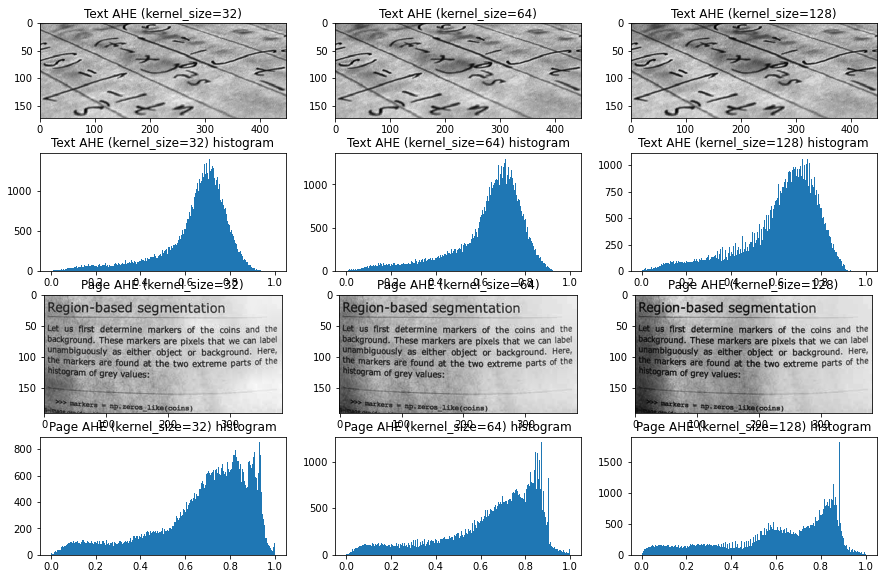

In [26]:
from skimage import exposure

# Aplicamos ecualización adaptativa de histograma con diferentes kernel_size
text_32 = exposure.equalize_adapthist(text, kernel_size=32)
text_64 = exposure.equalize_adapthist(text, kernel_size=64)
text_128 = exposure.equalize_adapthist(text, kernel_size=128)

page_32 = exposure.equalize_adapthist(page, kernel_size=32)
page_64 = exposure.equalize_adapthist(page, kernel_size=64)
page_128 = exposure.equalize_adapthist(page, kernel_size=128)

# Visualizar las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

ax[0, 0].imshow(text_32, cmap='gray')
ax[0, 0].set_title('Text AHE (kernel_size=32)')
ax[1, 0].hist(text_32.ravel(), bins=256)
ax[1, 0].set_title('Text AHE (kernel_size=32) histogram')

ax[0, 1].imshow(text_64, cmap='gray')
ax[0, 1].set_title('Text AHE (kernel_size=64)')
ax[1, 1].hist(text_64.ravel(), bins=256)
ax[1, 1].set_title('Text AHE (kernel_size=64) histogram')

ax[0, 2].imshow(text_128, cmap='gray')
ax[0, 2].set_title('Text AHE (kernel_size=128)')
ax[1, 2].hist(text_128.ravel(), bins=256)
ax[1, 2].set_title('Text AHE (kernel_size=128) histogram')

ax[2, 0].imshow(page_32, cmap='gray')
ax[2, 0].set_title('Page AHE (kernel_size=32)')
ax[3, 0].hist(page_32.ravel(), bins=256)
ax[3, 0].set_title('Page AHE (kernel_size=32) histogram')

ax[2, 1].imshow(page_64, cmap='gray')
ax[2, 1].set_title('Page AHE (kernel_size=64)')
ax[3, 1].hist(page_64.ravel(), bins=256)
ax[3, 1].set_title('Page AHE (kernel_size=64) histogram')

ax[2, 2].imshow(page_128, cmap='gray')
ax[2, 2].set_title('Page AHE (kernel_size=128)')
ax[3, 2].hist(page_128.ravel(), bins=256)
ax[3, 2].set_title('Page AHE (kernel_size=128) histogram')

plt.show()


b) **Control adaptativo de contraste**. Implemente una función que realice el
control adaptativo de contraste lineal visto en clase. Puede usar la función
*local_meanstd*, definida a continuación, para calcular las medias y desviaciones típicas locales. ¿Cómo influye el parámetro *sigma* en el resultado? Discuta los beneficios o inconvenientes de estas técnicas con respecto a los métodos globales.

In [27]:
from scipy import ndimage as ndi
from skimage.exposure import rescale_intensity

def local_mean_std(image, sigma=20):
    # Compute the local mean and std using Gaussians
    image = image.astype(np.float64)
    local_mean = ndi.gaussian_filter(image, sigma, mode='mirror')
    local_std = ndi.gaussian_filter(image**2, sigma, mode='mirror')
    local_std -= local_mean**2
    local_std = np.sqrt(local_std) + np.finfo(np.float64).eps
    return local_mean, local_std

def adaptive_control_LC(image, sigma, kernel_size, clip_limit):
    # Calculamos medias y desviaciones locales
    local_mean, local_std = local_mean_std(image, sigma=sigma)
    
    # Calculamos el contraste local
    local_clip_limit = clip_limit * np.max(local_std)
    contrast = np.minimum(local_std / local_clip_limit, 1)
    
    # Calculamos los factores de escala locales
    kernel = np.ones((kernel_size, kernel_size))
    local_max = ndi.maximum_filter(image, footprint=kernel, mode='mirror')
    local_min = ndi.minimum_filter(image, footprint=kernel, mode='mirror')
    scaling_factor = (local_max - local_min) / np.maximum(local_std, np.finfo(np.float64).eps)
    
    # Reescalamos la imagen usando los factores de escala locales y el contraste local
    rescaled_image = (image - local_mean) * scaling_factor * contrast + local_mean
    
    # Reescalamos la intensidad al rango [0, 1]
    rescaled_image = rescale_intensity(rescaled_image, out_range=(0, 1))
    
    return rescaled_image

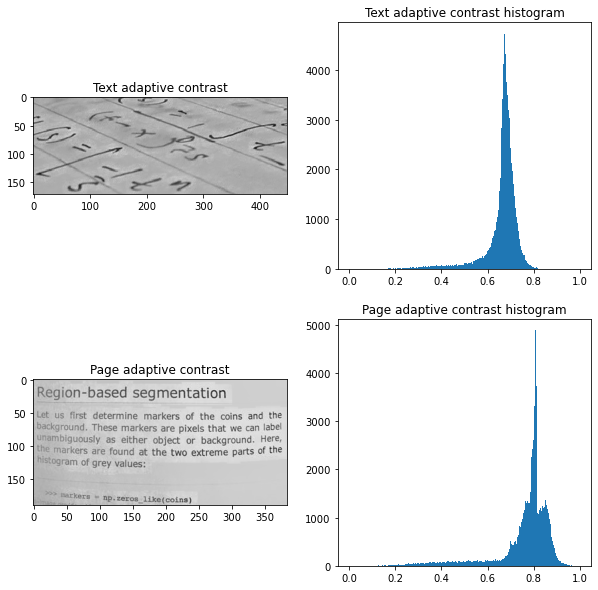

In [28]:
adaptive_text = adaptive_control_LC(text, sigma=20, kernel_size=20, clip_limit=0.01)
adaptive_page = adaptive_control_LC(page, sigma=20, kernel_size=20, clip_limit=0.01)

# Visualizar las imágenes resultantes y sus histogramas
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(adaptive_text, cmap='gray')
ax[0, 0].set_title('Text adaptive contrast')

ax[0, 1].hist(adaptive_text.ravel(), bins=256)
ax[0, 1].set_title('Text adaptive contrast histogram')

ax[1, 0].imshow(adaptive_page, cmap='gray')
ax[1, 0].set_title('Page adaptive contrast')

ax[1, 1].hist(adaptive_page.ravel(), bins=256)
ax[1, 1].set_title('Page adaptive contrast histogram')

plt.show()


El parámetro sigma controla la escala espacial sobre la cuál se calculan las medias y desviaciones estándar locales. A mayor valor de sigma, mayor será la suavización de la imagen, y en una escala más grande para el cálculo de las medias y desviaciones. Por lo tanto, en las regiones con grandes cambios de contraste, un valor de sigma más grande resultará en una adaptación de contraste más suave y gradual. Un valor más pequeño resultará en una adaptación de contraste más aguda y enfocada en regiones con cambios de contraste más locales y pequeños.

Los beneficios o inconvenientes de estas técnicas respecto a los métodos globales son

**Ejercicio 3.3.- Ajuste de contraste en color**  

Considere las imagenes de ejemplo *data.retina()* y *data.colorwheel()*. Apliqueles ecualización de histograma, mostrando los histogramas de entrada y salida para
cada canal RGB por separado. ¿Por qué cambia la tonalidad? ¿Cómo podríamos
hacer para ecualizar la luminosidad sin cambiar la tonalidad? Visualice ejemplos.

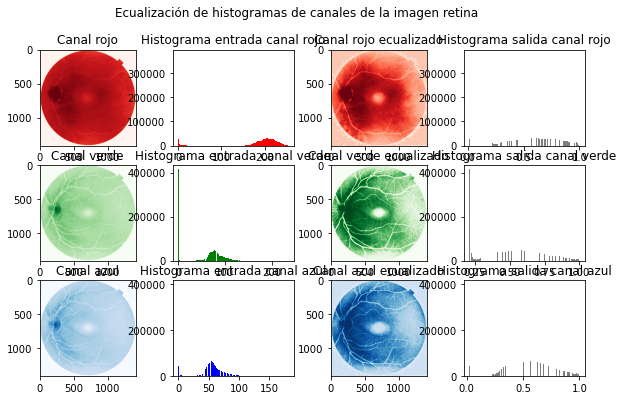

In [29]:
retina = data.retina()

# Ecualización del histograma de la imagen
retina_r = retina[:, :, 0]
retina_g = retina[:, :, 1]
retina_b = retina[:, :, 2]

retina_r_eq = exposure.equalize_hist(retina_r)
retina_g_eq = exposure.equalize_hist(retina_g)
retina_b_eq = exposure.equalize_hist(retina_b)

# Visualización de los resultados
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))

axs[0, 0].imshow(retina_r, cmap='Reds')
axs[0, 0].set_title('Canal rojo')
axs[0, 1].hist(retina_r.ravel(), bins=256, color='red')
axs[0, 1].set_title('Histograma entrada canal rojo')
axs[0, 2].imshow(retina_r_eq, cmap='Reds')
axs[0, 2].set_title('Canal rojo ecualizado')
axs[0, 3].hist(retina_r_eq.ravel(), bins=256, color='black', alpha=0.5)
axs[0, 3].set_title('Histograma salida canal rojo')
axs[1, 0].imshow(retina_g, cmap='Greens')
axs[1, 0].set_title('Canal verde')
axs[1, 1].hist(retina_g.ravel(), bins=256, color='green')
axs[1, 1].set_title('Histograma entrada canal verde')
axs[1, 2].imshow(retina_g_eq, cmap='Greens')
axs[1, 2].set_title('Canal verde ecualizado')
axs[1, 3].hist(retina_g_eq.ravel(), bins=256, color='black', alpha=0.5)
axs[1, 3].set_title('Histograma salida canal verde')
axs[2, 0].imshow(retina_b, cmap='Blues')
axs[2, 0].set_title('Canal azul')
axs[2, 1].hist(retina_b.ravel(), bins=256, color='blue')
axs[2, 1].set_title('Histograma entrada canal azul')
axs[2, 2].imshow(retina_b_eq, cmap='Blues')
axs[2, 2].set_title('Canal azul ecualizado')
axs[2, 3].hist(retina_b_eq.ravel(), bins=256, color='black', alpha=0.5)
axs[2, 3].set_title('Histograma salida canal azul')

plt.suptitle('Ecualización de histogramas de canales de la imagen retina')
plt.show()

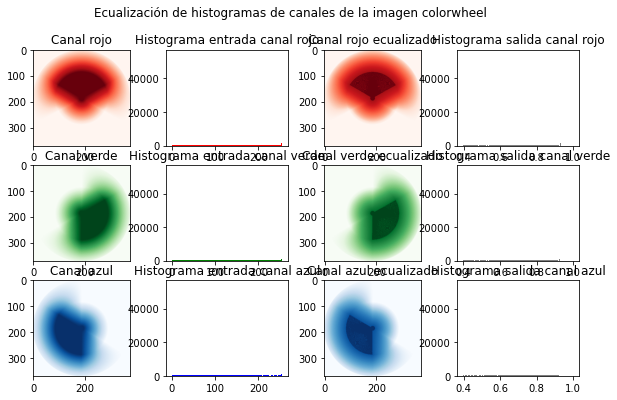

In [30]:
colorwheel = data.colorwheel()

# Ecualización del histograma de la imagen
colorwheel_r = colorwheel[:, :, 0]
colorwheel_g = colorwheel[:, :, 1]
colorwheel_b = colorwheel[:, :, 2]

colorwheel_r_eq = exposure.equalize_hist(colorwheel_r)
colorwheel_g_eq = exposure.equalize_hist(colorwheel_g)
colorwheel_b_eq = exposure.equalize_hist(colorwheel_b)

# Visualización de los resultados
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))

axs[0, 0].imshow(colorwheel_r, cmap='Reds')
axs[0, 0].set_title('Canal rojo')
axs[0, 1].hist(colorwheel_r.ravel(), bins=256, color='red')
axs[0, 1].set_title('Histograma entrada canal rojo')
axs[0, 2].imshow(colorwheel_r_eq, cmap='Reds')
axs[0, 2].set_title('Canal rojo ecualizado')
axs[0, 3].hist(colorwheel_r_eq.ravel(), bins=256, color='black', alpha=0.5)
axs[0, 3].set_title('Histograma salida canal rojo')
axs[1, 0].imshow(colorwheel_g, cmap='Greens')
axs[1, 0].set_title('Canal verde')
axs[1, 1].hist(colorwheel_g.ravel(), bins=256, color='green')
axs[1, 1].set_title('Histograma entrada canal verde')
axs[1, 2].imshow(colorwheel_g_eq, cmap='Greens')
axs[1, 2].set_title('Canal verde ecualizado')
axs[1, 3].hist(colorwheel_g_eq.ravel(), bins=256, color='black', alpha=0.5)
axs[1, 3].set_title('Histograma salida canal verde')
axs[2, 0].imshow(colorwheel_b, cmap='Blues')
axs[2, 0].set_title('Canal azul')
axs[2, 1].hist(colorwheel_b.ravel(), bins=256, color='blue')
axs[2, 1].set_title('Histograma entrada canal azul')
axs[2, 2].imshow(colorwheel_b_eq, cmap='Blues')
axs[2, 2].set_title('Canal azul ecualizado')
axs[2, 3].hist(colorwheel_b_eq.ravel(), bins=256, color='black', alpha=0.5)
axs[2, 3].set_title('Histograma salida canal azul')

plt.suptitle('Ecualización de histogramas de canales de la imagen colorwheel')
plt.show()

La tonalidad cambia porque la ecualización del histograma ajusta la distribución de valores de píxeles en una imagen para que cubran todo el rango de intensidades disponibles, por lo que al aplicarla a cada canal, los valores se redistribuyen para que cubran todo el rango de intensidadades, lo que puede cambiar la tonalidad de la imagen.

Para ecualizar la tonalidad sin cambiar la luminosidad podríamos  utilizar la ecualización del histograma adaptativa, pues al dividir la imagen en bloques pequeños y ecualizar el histograma de cada bloque por separado, se pueden adaptar los cambios locales en la luminosidad sin afectar a la tonalidad global de la imagen. 

In [31]:
# Ecualización del histograma adaptativa de la imagen de la retina
# utilizamos la función equalize_adapthist de la librería skimage.exposure
retina_r_adapteq = exposure.equalize_adapthist(retina_r, clip_limit=0.03)
retina_g_adapteq = exposure.equalize_adapthist(retina_g, clip_limit=0.03)
retina_b_adapteq = exposure.equalize_adapthist(retina_b, clip_limit=0.03)

colorwheel_r_adptateq = exposure.equalize_adapthist(colorwheel_r, clip_limit=0.03)
colorwheel_g_adptateq = exposure.equalize_adapthist(colorwheel_g, clip_limit=0.03)
colorwheel_b_adptateq = exposure.equalize_adapthist(colorwheel_b, clip_limit=0.03)

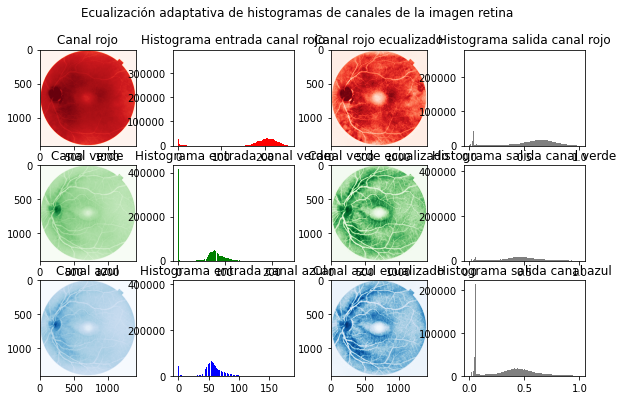

In [32]:
# Visualización de los resultados
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))

axs[0, 0].imshow(retina_r, cmap='Reds')
axs[0, 0].set_title('Canal rojo')
axs[0, 1].hist(retina_r.ravel(), bins=256, color='red')
axs[0, 1].set_title('Histograma entrada canal rojo')
axs[0, 2].imshow(retina_r_adapteq, cmap='Reds')
axs[0, 2].set_title('Canal rojo ecualizado')
axs[0, 3].hist(retina_r_adapteq.ravel(), bins=256, color='black', alpha=0.5)
axs[0, 3].set_title('Histograma salida canal rojo')
axs[1, 0].imshow(retina_g, cmap='Greens')
axs[1, 0].set_title('Canal verde')
axs[1, 1].hist(retina_g.ravel(), bins=256, color='green')
axs[1, 1].set_title('Histograma entrada canal verde')
axs[1, 2].imshow(retina_g_adapteq, cmap='Greens')
axs[1, 2].set_title('Canal verde ecualizado')
axs[1, 3].hist(retina_g_adapteq.ravel(), bins=256, color='black', alpha=0.5)
axs[1, 3].set_title('Histograma salida canal verde')
axs[2, 0].imshow(retina_b, cmap='Blues')
axs[2, 0].set_title('Canal azul')
axs[2, 1].hist(retina_b.ravel(), bins=256, color='blue')
axs[2, 1].set_title('Histograma entrada canal azul')
axs[2, 2].imshow(retina_b_adapteq, cmap='Blues')
axs[2, 2].set_title('Canal azul ecualizado')
axs[2, 3].hist(retina_b_adapteq.ravel(), bins=256, color='black', alpha=0.5)
axs[2, 3].set_title('Histograma salida canal azul')

plt.suptitle('Ecualización adaptativa de histogramas de canales de la imagen retina')
plt.show()

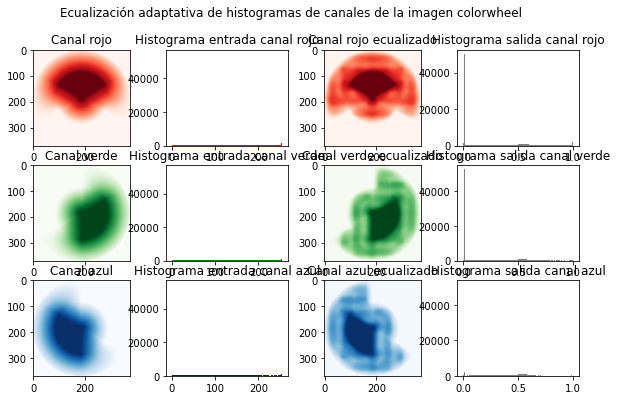

In [33]:
# Visualización de los resultados
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))

axs[0, 0].imshow(colorwheel_r, cmap='Reds')
axs[0, 0].set_title('Canal rojo')
axs[0, 1].hist(colorwheel_r.ravel(), bins=256, color='red')
axs[0, 1].set_title('Histograma entrada canal rojo')
axs[0, 2].imshow(colorwheel_r_adptateq, cmap='Reds')
axs[0, 2].set_title('Canal rojo ecualizado')
axs[0, 3].hist(colorwheel_r_adptateq.ravel(), bins=256, color='black', alpha=0.5)
axs[0, 3].set_title('Histograma salida canal rojo')
axs[1, 0].imshow(colorwheel_g, cmap='Greens')
axs[1, 0].set_title('Canal verde')
axs[1, 1].hist(colorwheel_g.ravel(), bins=256, color='green')
axs[1, 1].set_title('Histograma entrada canal verde')
axs[1, 2].imshow(colorwheel_g_adptateq, cmap='Greens')
axs[1, 2].set_title('Canal verde ecualizado')
axs[1, 3].hist(colorwheel_g_adptateq.ravel(), bins=256, color='black', alpha=0.5)
axs[1, 3].set_title('Histograma salida canal verde')
axs[2, 0].imshow(colorwheel_b, cmap='Blues')
axs[2, 0].set_title('Canal azul')
axs[2, 1].hist(colorwheel_b.ravel(), bins=256, color='blue')
axs[2, 1].set_title('Histograma entrada canal azul')
axs[2, 2].imshow(colorwheel_b_adptateq, cmap='Blues')
axs[2, 2].set_title('Canal azul ecualizado')
axs[2, 3].hist(colorwheel_b_adptateq.ravel(), bins=256, color='black', alpha=0.5)
axs[2, 3].set_title('Histograma salida canal azul')

plt.suptitle('Ecualización adaptativa de histogramas de canales de la imagen colorwheel')
plt.show()

Como podemos observar, la ecualización adaptativa del histograma ha mejorado la visibilidad de los detalles de la imagen sin cambiar la tonalidad de la misma.

### **4. Filtrado espacial y eliminación de ruido**

#### Ejercicio 4.1.- Filtro de medias  
a) Implemente una función que permita hacer un filtrado de medias sobre una
imagen de entrada usando operaciones de convolución. La función debe tener
la siguiente cabecera y parámetros:

In [34]:
from scipy.signal import convolve2d

def box_filter(image, size=3, mode='nearest'):
    """Perform a mean filter using a square footprint of given size
    Keyword arguments:
    image -- the input image
    size -- the size of the box filter
    mode -- the convolution mode for boundary management
    """ 
    
    # Creamos el filtro de medias
    kernel = np.ones((size, size)) / (size ** 2)
    
    # Convolución de la imagen con el filtro de medias
    filtered_image = convolve2d(image, kernel, mode=mode)
    
    return filtered_image

b) Visualice el resultado de aplicar la función box filter sobre la imagen
*data.coins()*, usando diferentes tamaños de ventana.

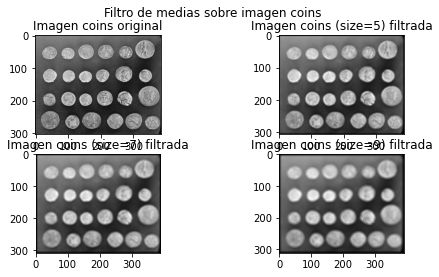

In [35]:
coins = data.coins()

# Aplicamos la función box_filter con diferentes tamaños de ventana
filtered_coins_5 = box_filter(coins, size=5, mode='full')
filtered_coins_7 = box_filter(coins, size=7, mode='full')
filtered_coins_9 = box_filter(coins, size=9, mode='full')

# Mostrar la imagen original y la imagen filtrada
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))

axs[0, 0].imshow(coins, cmap='gray')
axs[0, 0].set_title('Imagen coins original')

axs[0, 1].imshow(filtered_coins_5, cmap='gray')
axs[0, 1].set_title('Imagen coins (size=5) filtrada')

axs[1, 0].imshow(filtered_coins_7, cmap='gray')
axs[1, 0].set_title('Imagen coins (size=7) filtrada')

axs[1, 1].imshow(filtered_coins_9, cmap='gray')
axs[1, 1].set_title('Imagen coins (size=9) filtrada')

plt.suptitle('Filtro de medias sobre imagen coins')
plt.show()

#### Ejercicio 4.2.- Eliminación de ruido: estudio comparativo

Para la imagen *data.camera()* (en escala de grises):

a) Altere la imagen con ruido blancoa Gaussiano aditivo. Seleccione dos valores para el parámetro de varianza (uno alto y otro bajo), de forma que el ruido sea apreciablemente diferente entre ambos, y con respecto a la imagen original, pero sin perder toda la información de la imagen. Visualice los resultados.

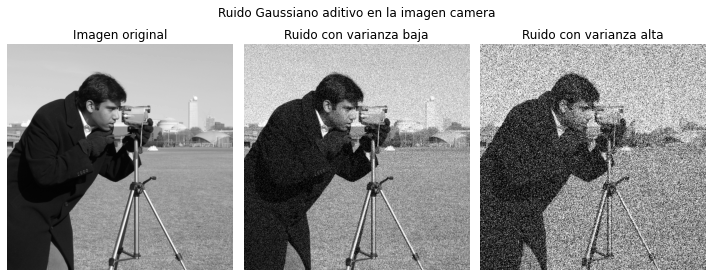

In [36]:
import skimage.util as util

camera = data.camera()

# Añadimos ruido gaussiano aditivo con varianza baja 
gaussian_camera1 = util.random_noise(camera, mode='gaussian', var=0.01)

# Añadimos ruido gaussiano aditivo con varianza alta 
gaussian_camera2 = util.random_noise(camera, mode='gaussian', var=0.1)

# Mostramos la imagen original y las imágenes con ruido
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axs[0].imshow(camera, cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(gaussian_camera1, cmap='gray')
axs[1].set_title('Ruido con varianza baja')

axs[2].imshow(gaussian_camera2, cmap='gray')
axs[2].set_title('Ruido con varianza alta')

for ax in axs:
    ax.axis('off')

plt.suptitle('Ruido Gaussiano aditivo en la imagen camera')
plt.tight_layout()
plt.show()

b) Altere la imagen con **ruido ”sal y pimienta”**. Seleccione dos valores para
el parámetro de de cantidad (uno bajo y otro alto), de forma que el ruido sea
apreciablemente diferente entre ambos, y con respecto a la imagen original,
pero sin perder toda la información de la imagen. Visualice los resultados.

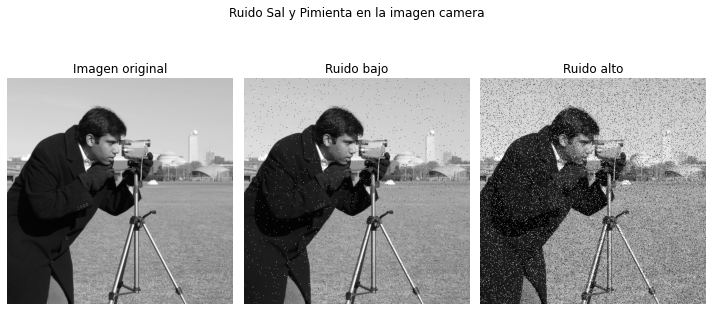

In [37]:
# Agregamos ruido sal y pimienta con una cantidad baja
noisy_low = util.random_noise(camera, mode='s&p', amount=0.01)

# Agregamos ruido sal y pimienta con una cantidad alta
noisy_high = util.random_noise(camera, mode='s&p', amount=0.1)

# Visualizamos las imágenes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

axs[0].imshow(camera, cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(noisy_low, cmap='gray')
axs[1].set_title('Ruido bajo')

axs[2].imshow(noisy_high, cmap='gray')
axs[2].set_title('Ruido alto')

for ax in axs:
    ax.axis('off')

plt.suptitle('Ruido Sal y Pimienta en la imagen camera')
plt.tight_layout()
plt.show()

c) Escriba un código que aplique los filtros *ndi.gaussian_filter* y
*ndi.median_filter* a la imagen original, y a las resultantes de los apartados
(a) y (b), mostrando los resultados de forma ordenada.

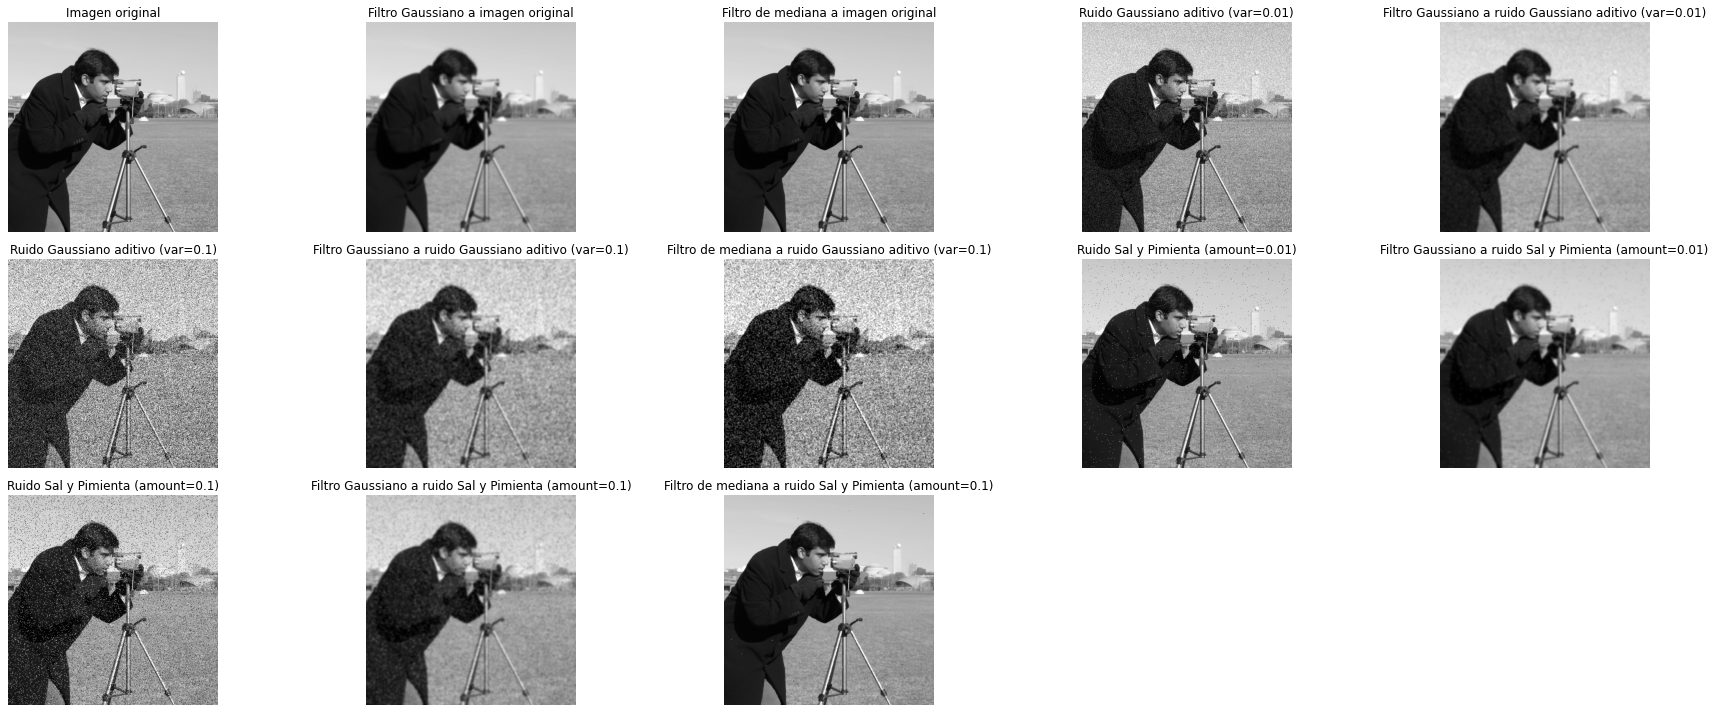

In [38]:
from scipy import ndimage
# Aplicamos el filtro gaussiano
gauss_camera = ndimage.gaussian_filter(camera, sigma=2)
gauss_gaussian_camera1 = ndimage.gaussian_filter(gaussian_camera1, sigma=2)
gauss_gaussian_camera2 = ndimage.gaussian_filter(gaussian_camera2, sigma=2)
gauss_noisy_low = ndimage.gaussian_filter(noisy_low, sigma=2)
gauss_noisy_high = ndimage.gaussian_filter(noisy_high, sigma=2)

# Aplicamos el filtro de mediana
median_camera = ndimage.median_filter(camera, size=3)
median_gaussian_camera1 = ndimage.median_filter(gaussian_camera1, size=3)
median_gaussian_camera2 = ndimage.median_filter(gaussian_camera2, size=3)
median_noisy_low = ndimage.median_filter(noisy_low, size=3)
median_noisy_high = ndimage.median_filter(noisy_high, size=3)

# Visualizamos las imágenes
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))

axs[0, 0].imshow(camera, cmap='gray')
axs[0, 0].set_title('Imagen original')

axs[0, 1].imshow(gauss_camera, cmap='gray')
axs[0, 1].set_title('Filtro Gaussiano a imagen original')

axs[0, 2].imshow(median_camera, cmap='gray')
axs[0, 2].set_title('Filtro de mediana a imagen original')

axs[0, 3].imshow(gaussian_camera1, cmap='gray')
axs[0, 3].set_title('Ruido Gaussiano aditivo (var=0.01)')

axs[0, 4].imshow(gauss_gaussian_camera1, cmap='gray')
axs[0, 4].set_title('Filtro Gaussiano a ruido Gaussiano aditivo (var=0.01)')

axs[1, 0].imshow(gaussian_camera2, cmap='gray')
axs[1, 0].set_title('Ruido Gaussiano aditivo (var=0.1)')

axs[1, 1].imshow(gauss_gaussian_camera2, cmap='gray')
axs[1, 1].set_title('Filtro Gaussiano a ruido Gaussiano aditivo (var=0.1)')

axs[1, 2].imshow(median_gaussian_camera2, cmap='gray')
axs[1, 2].set_title('Filtro de mediana a ruido Gaussiano aditivo (var=0.1)')

axs[1, 3].imshow(noisy_low, cmap='gray')
axs[1, 3].set_title('Ruido Sal y Pimienta (amount=0.01)')

axs[1, 4].imshow(gauss_noisy_low, cmap='gray')
axs[1, 4].set_title('Filtro Gaussiano a ruido Sal y Pimienta (amount=0.01)')

axs[2, 0].imshow(noisy_high, cmap='gray')
axs[2, 0].set_title('Ruido Sal y Pimienta (amount=0.1)')

axs[2, 1].imshow(gauss_noisy_high, cmap='gray')
axs[2, 1].set_title('Filtro Gaussiano a ruido Sal y Pimienta (amount=0.1)')

axs[2, 2].imshow(median_noisy_high, cmap='gray')
axs[2, 2].set_title('Filtro de mediana a ruido Sal y Pimienta (amount=0.1)')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

d) Explore el efecto de los parámetros de tamaño (size o sigma, según el caso)
en los resultados del apartado (c), mostrando ejemplos representativos.
Discuta las ventajas e inconvenientes de los filtros comparados a la vista de los
resultados, teniendo en cuenta cómo afectan sus parámetros.

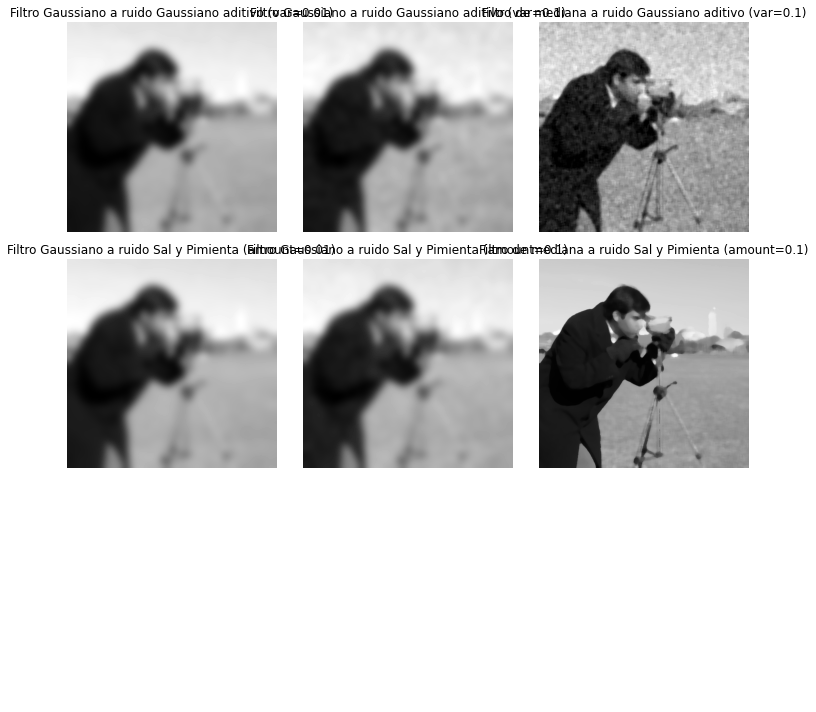

In [39]:
from scipy import ndimage
# Aplicamos el filtro gaussiano
# Tomamos valores de sigma grandes
gauss_camera = ndimage.gaussian_filter(camera, sigma=2)
gauss_gaussian_camera1 = ndimage.gaussian_filter(gaussian_camera1, sigma=10)
gauss_gaussian_camera2 = ndimage.gaussian_filter(gaussian_camera2, sigma=10)
gauss_noisy_low = ndimage.gaussian_filter(noisy_low, sigma=10)
gauss_noisy_high = ndimage.gaussian_filter(noisy_high, sigma=10)

# Aplicamos el filtro de mediana
# Tomamos valores de size grandes
median_camera = ndimage.median_filter(camera, size=3)
median_gaussian_camera1 = ndimage.median_filter(gaussian_camera1, size=10)
median_gaussian_camera2 = ndimage.median_filter(gaussian_camera2, size=10)
median_noisy_low = ndimage.median_filter(noisy_low, size=10)
median_noisy_high = ndimage.median_filter(noisy_high, size=10)

# Visualizamos las imágenes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axs[0, 0].imshow(gauss_gaussian_camera1, cmap='gray')
axs[0, 0].set_title('Filtro Gaussiano a ruido Gaussiano aditivo (var=0.01)')

axs[0, 1].imshow(gauss_gaussian_camera2, cmap='gray')
axs[0, 1].set_title('Filtro Gaussiano a ruido Gaussiano aditivo (var=0.1)')

axs[0, 2].imshow(median_gaussian_camera2, cmap='gray')
axs[0, 2].set_title('Filtro de mediana a ruido Gaussiano aditivo (var=0.1)')

axs[1, 0].imshow(gauss_noisy_low, cmap='gray')
axs[1, 0].set_title('Filtro Gaussiano a ruido Sal y Pimienta (amount=0.01)')

axs[1, 1].imshow(gauss_noisy_high, cmap='gray')
axs[1, 1].set_title('Filtro Gaussiano a ruido Sal y Pimienta (amount=0.1)')

axs[1, 2].imshow(median_noisy_high, cmap='gray')
axs[1, 2].set_title('Filtro de mediana a ruido Sal y Pimienta (amount=0.1)')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

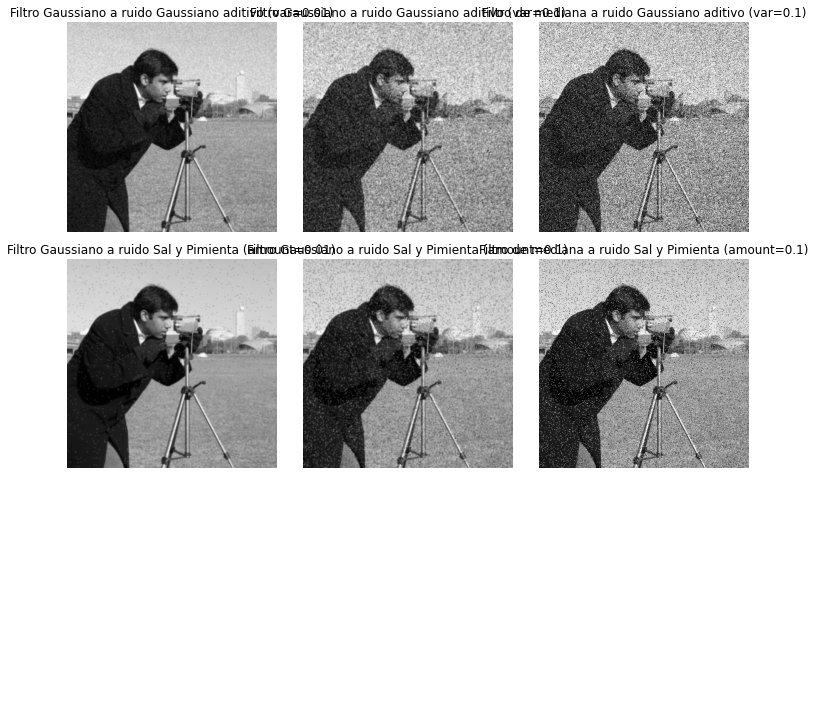

In [40]:
from scipy import ndimage
# Aplicamos el filtro gaussiano
# Tomamos valores de sigma muy pequeños 
gauss_camera = ndimage.gaussian_filter(camera, sigma=2)
gauss_gaussian_camera1 = ndimage.gaussian_filter(gaussian_camera1, sigma=1)
gauss_gaussian_camera2 = ndimage.gaussian_filter(gaussian_camera2, sigma=1)
gauss_noisy_low = ndimage.gaussian_filter(noisy_low, sigma=1)
gauss_noisy_high = ndimage.gaussian_filter(noisy_high, sigma=1)

# Aplicamos el filtro de mediana
# Tomamos valores de size muy pequeños
median_camera = ndimage.median_filter(camera, size=3)
median_gaussian_camera1 = ndimage.median_filter(gaussian_camera1, size=1)
median_gaussian_camera2 = ndimage.median_filter(gaussian_camera2, size=1)
median_noisy_low = ndimage.median_filter(noisy_low, size=1)
median_noisy_high = ndimage.median_filter(noisy_high, size=1)

# Visualizamos las imágenes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axs[0, 0].imshow(gauss_gaussian_camera1, cmap='gray')
axs[0, 0].set_title('Filtro Gaussiano a ruido Gaussiano aditivo (var=0.01)')

axs[0, 1].imshow(gauss_gaussian_camera2, cmap='gray')
axs[0, 1].set_title('Filtro Gaussiano a ruido Gaussiano aditivo (var=0.1)')

axs[0, 2].imshow(median_gaussian_camera2, cmap='gray')
axs[0, 2].set_title('Filtro de mediana a ruido Gaussiano aditivo (var=0.1)')

axs[1, 0].imshow(gauss_noisy_low, cmap='gray')
axs[1, 0].set_title('Filtro Gaussiano a ruido Sal y Pimienta (amount=0.01)')

axs[1, 1].imshow(gauss_noisy_high, cmap='gray')
axs[1, 1].set_title('Filtro Gaussiano a ruido Sal y Pimienta (amount=0.1)')

axs[1, 2].imshow(median_noisy_high, cmap='gray')
axs[1, 2].set_title('Filtro de mediana a ruido Sal y Pimienta (amount=0.1)')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

En ambas funciones, aumentar los valores de sigma y size aumenta el suavizado de la imagen y el tiempo de procesamiento. Para obtener una imagen más suave, se pueden aumentar estos valores, pero se debe tener en cuenta que un aumento excesivo de los valores puede producir una imagen demasiado borrosa o perder detalles importantes, como se puede observar en el ejemplo con valores de sigma=10 y size=10. Por otro lado, disminuir los valores de sigma y size puede reducir el suavizado y el tiempo de procesamiento, pero la imagen resultante puede seguir teniendo ruido o detalles no deseados, como ocurre en el otro caso con sigma=1 y size=1.

Las ventajas del filtro ndi.gaussian_filter son que es efectivo en la reducción del ruido gaussiano y que la desviación estándar puede ajustarse para adaptarse a las características específicas de la imagen, mientras que sus desventajas son que el filtro puede eliminar detalles finos y bordes, y que el suavizado puede ser demasiado intenso.  
Las ventajas del ndi.median_filter son que es efectivo en la reducción de diferentes tipos de ruido, como en este caso, el ruido sal y pimienta, que el tamaño de kernel puede ajustarse de acuerdo a las características de la imagen y que es adecuado para suavizar la imagen sin afectar los bordes y detalles finos de la imagen. Por otro lado, sus inconvenientes son que es menos efectivo en la reducción de ruido gaussiano y que el tiempo de procesamiento puede aumentar significativamente con el tamaño de kernel.

### **5. Operadores morfológicos**

#### Ejercicio 5.1.- Morfología binaria

Aplique las siguientes operaciones morfológicas a la imagen morph256.png (Figura
2), utilizando elementos estructurantes cuadrados (morphology.square) y circulares
(morphology.disk) de tamaños 5, 10 y 15:
* **Erosión**: *morphology.erosion*
* **Dilatación**: *morphology.dilation*
* **Apertura**: *morphology.opening*
* **Cierre**: *morphology.closing*  

a) Visualice los resultados de forma ordenada.

Text(0.5, 1.0, 'Imagen original')

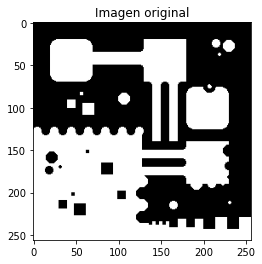

In [44]:
from scipy import ndimage
from skimage import morphology

morph = io.imread("morph256.png", as_gray=True)

# Mostramos la imagen original
plt.imshow(morph, cmap='gray')
plt.title('Imagen original')

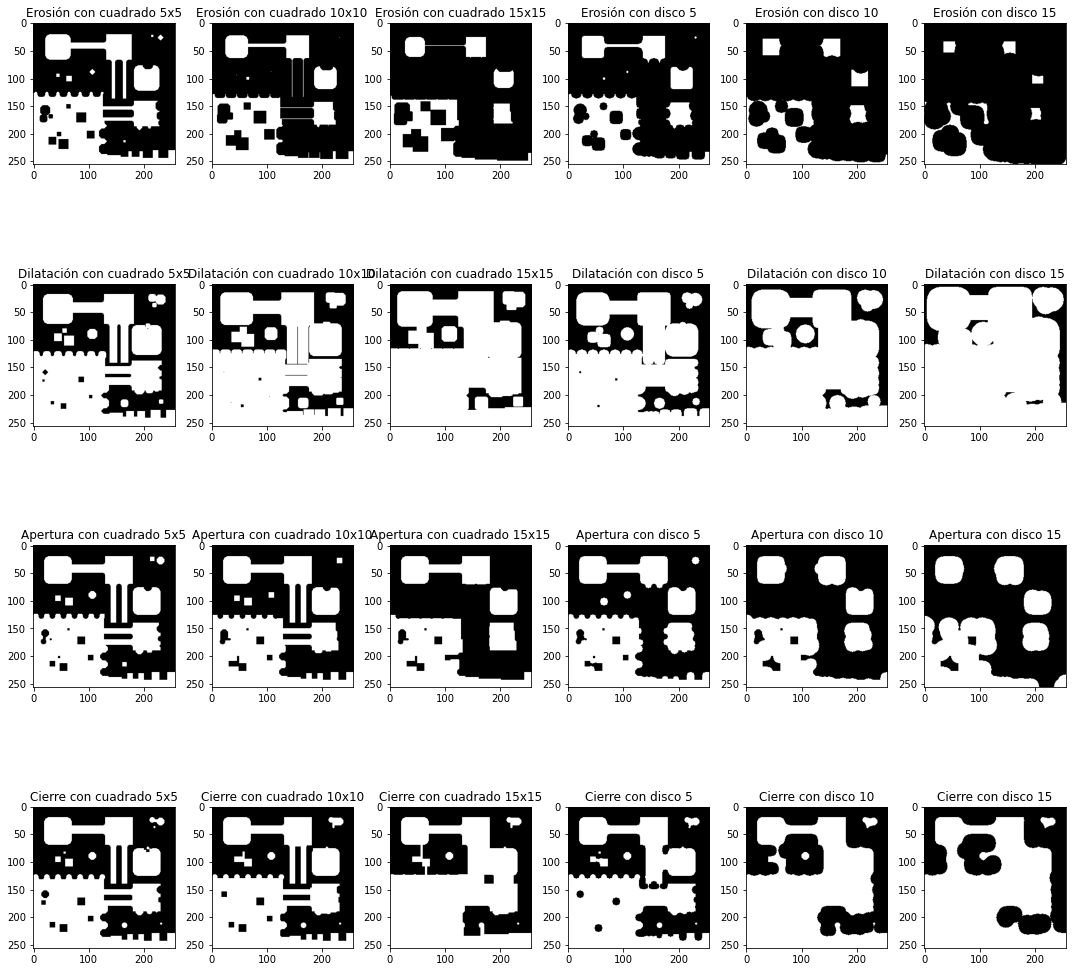

In [42]:
# Definir los elementos estructurantes
square5 = morphology.square(5)
square10 = morphology.square(10)
square15 = morphology.square(15)
disk5 = morphology.disk(5)
disk10 = morphology.disk(10)
disk15 = morphology.disk(15)

# Aplicar las operaciones morfológicas con los elementos estructurantes definidos
erosion_square5 = morphology.erosion(morph, square5)
erosion_square10 = morphology.erosion(morph, square10)
erosion_square15 = morphology.erosion(morph, square15)
erosion_disk5 = morphology.erosion(morph, disk5)
erosion_disk10 = morphology.erosion(morph, disk10)
erosion_disk15 = morphology.erosion(morph, disk15)

dilation_square5 = morphology.dilation(morph, square5)
dilation_square10 = morphology.dilation(morph, square10)
dilation_square15 = morphology.dilation(morph, square15)
dilation_disk5 = morphology.dilation(morph, disk5)
dilation_disk10 = morphology.dilation(morph, disk10)
dilation_disk15 = morphology.dilation(morph, disk15)

opening_square5 = morphology.opening(morph, square5)
opening_square10 = morphology.opening(morph, square10)
opening_square15 = morphology.opening(morph, square15)
opening_disk5 = morphology.opening(morph, disk5)
opening_disk10 = morphology.opening(morph, disk10)
opening_disk15 = morphology.opening(morph, disk15)

closing_square5 = morphology.closing(morph, square5)
closing_square10 = morphology.closing(morph, square10)
closing_square15 = morphology.closing(morph, square15)
closing_disk5 = morphology.closing(morph, disk5)
closing_disk10 = morphology.closing(morph, disk10)
closing_disk15 = morphology.closing(morph, disk15)

# Visualizar los resultados de forma ordenada
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(15, 15))

ax[0, 0].imshow(erosion_square5, cmap='gray')
ax[0, 0].set_title('Erosión con cuadrado 5x5')

ax[0, 1].imshow(erosion_square10, cmap='gray')
ax[0, 1].set_title('Erosión con cuadrado 10x10')

ax[0, 2].imshow(erosion_square15, cmap='gray')
ax[0, 2].set_title('Erosión con cuadrado 15x15')

ax[0, 3].imshow(erosion_disk5, cmap='gray')
ax[0, 3].set_title('Erosión con disco 5')

ax[0, 4].imshow(erosion_disk10, cmap='gray')
ax[0, 4].set_title('Erosión con disco 10')

ax[0, 5].imshow(erosion_disk15, cmap='gray')
ax[0, 5].set_title('Erosión con disco 15')

ax[1, 0].imshow(dilation_square5, cmap='gray')
ax[1, 0].set_title('Dilatación con cuadrado 5x5')

ax[1, 1].imshow(dilation_square10, cmap='gray')
ax[1, 1].set_title('Dilatación con cuadrado 10x10')

ax[1, 2].imshow(dilation_square15, cmap='gray')
ax[1, 2].set_title('Dilatación con cuadrado 15x15')

ax[1, 3].imshow(dilation_disk5, cmap='gray')
ax[1, 3].set_title('Dilatación con disco 5')

ax[1, 4].imshow(dilation_disk10, cmap='gray')
ax[1, 4].set_title('Dilatación con disco 10')

ax[1, 5].imshow(dilation_disk15, cmap='gray')
ax[1, 5].set_title('Dilatación con disco 15')

ax[2, 0].imshow(opening_square5, cmap='gray')
ax[2, 0].set_title('Apertura con cuadrado 5x5')

ax[2, 1].imshow(opening_square10, cmap='gray')
ax[2, 1].set_title('Apertura con cuadrado 10x10')

ax[2, 2].imshow(opening_square15, cmap='gray')
ax[2, 2].set_title('Apertura con cuadrado 15x15')

ax[2, 3].imshow(opening_disk5, cmap='gray')
ax[2, 3].set_title('Apertura con disco 5')

ax[2, 4].imshow(opening_disk10, cmap='gray')
ax[2, 4].set_title('Apertura con disco 10')

ax[2, 5].imshow(opening_disk15, cmap='gray')
ax[2, 5].set_title('Apertura con disco 15')

ax[3, 0].imshow(closing_square5, cmap='gray')
ax[3, 0].set_title('Cierre con cuadrado 5x5')

ax[3, 1].imshow(closing_square10, cmap='gray')
ax[3, 1].set_title('Cierre con cuadrado 10x10')

ax[3, 2].imshow(closing_square15, cmap='gray')
ax[3, 2].set_title('Cierre con cuadrado 15x15')

ax[3, 3].imshow(closing_disk5, cmap='gray')
ax[3, 3].set_title('Cierre con disco 5')

ax[3, 4].imshow(closing_disk10, cmap='gray')
ax[3, 4].set_title('Cierre con disco 10')

ax[3, 5].imshow(closing_disk15, cmap='gray')
ax[3, 5].set_title('Cierre con disco 15')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

b) ¿Qué diferencias se aprecian?

Como la erosión reduce el tamaño de los objetos de la imagen, eliminando los píxeles de los bordes, vemos que cuanto mayor es el tamaño del elemento estructural utilizado, más pequeños son los objetos después de la erosión. El uso de un elemento estructural de disco (morphology.disk) produce una erosión más suave y redondeada que el uso de un elemento estructural cuadrado (morphology.square).  
La dilatación, al contrario que la erosión, aumenta el tamaño de los objetos de la imagen, agregando píxeles a los bordes. El uso de un elemento estructural más grande aumentará más el tamaño de los objetos, y el uso de un elemento estructural de disco dará como resultado una dilatación más suave y redondeada que el uso de uno cuadrado.  
La apertura combina la erosión y la dilatación, eliminando pequeños objetos y agujeros, preservando los objetos más grandes. Por lo tanto, cuanto mayor sea el tamaño del elemento estructural utilizado, más grande será el objeto preservado. El uso de un elemento estructural de disco dará como resultado una apertura más suave y redondeada que el uso de un elemento estructural cuadrado.  
El cierre combina la erosión y la dilatación, pero en este caso, los pequeños agujeros se llenan y los objetos pequeños se conectan. De manera similar a la apertura, cuanto mayor sea el tamaño del elemento estructural utilizado, más grande será el objeto conectado. El uso de un elemento estructural de disco dará como resultado un cierre más suave y redondeado que el uso de un elemento estructural cuadrado.

#### Ejercicio 5.2.- Morfología en escala de grises

Repita los resultados del Ejercicio 5.1 con la imagen *data.camera()*. Visualice los
resultados de forma ordenada y explique qué efectos tiene cada uno de los operadores.

Text(0.5, 1.0, 'Imagen original')

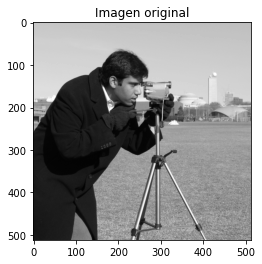

In [45]:
camera = data.camera()

# Mostramos la imagen original
plt.imshow(camera, cmap='gray')
plt.title('Imagen original')

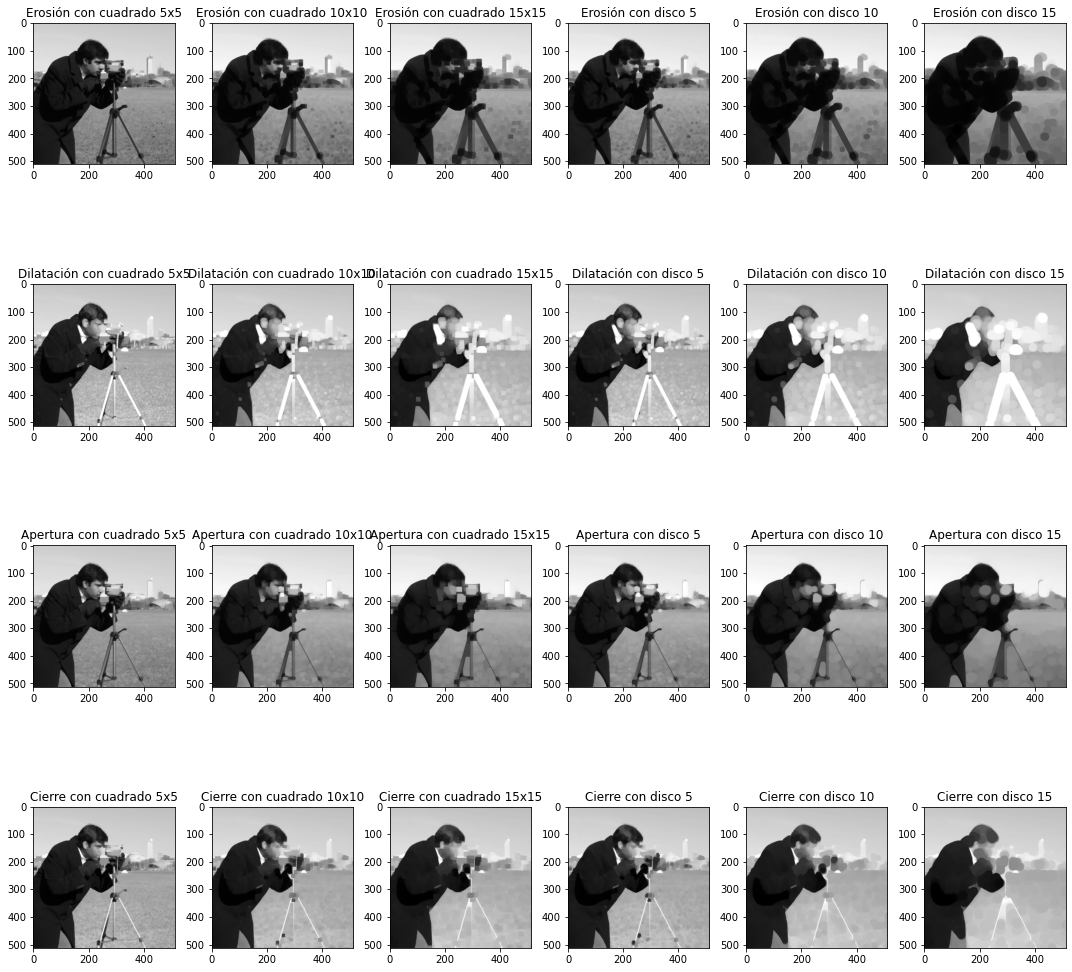

In [46]:
# Definir los elementos estructurantes
square5 = morphology.square(5)
square10 = morphology.square(10)
square15 = morphology.square(15)
disk5 = morphology.disk(5)
disk10 = morphology.disk(10)
disk15 = morphology.disk(15)

# Aplicar las operaciones morfológicas con los elementos estructurantes definidos
erosion_square5 = morphology.erosion(camera, square5)
erosion_square10 = morphology.erosion(camera, square10)
erosion_square15 = morphology.erosion(camera, square15)
erosion_disk5 = morphology.erosion(camera, disk5)
erosion_disk10 = morphology.erosion(camera, disk10)
erosion_disk15 = morphology.erosion(camera, disk15)

dilation_square5 = morphology.dilation(camera, square5)
dilation_square10 = morphology.dilation(camera, square10)
dilation_square15 = morphology.dilation(camera, square15)
dilation_disk5 = morphology.dilation(camera, disk5)
dilation_disk10 = morphology.dilation(camera, disk10)
dilation_disk15 = morphology.dilation(camera, disk15)

opening_square5 = morphology.opening(camera, square5)
opening_square10 = morphology.opening(camera, square10)
opening_square15 = morphology.opening(camera, square15)
opening_disk5 = morphology.opening(camera, disk5)
opening_disk10 = morphology.opening(camera, disk10)
opening_disk15 = morphology.opening(camera, disk15)

closing_square5 = morphology.closing(camera, square5)
closing_square10 = morphology.closing(camera, square10)
closing_square15 = morphology.closing(camera, square15)
closing_disk5 = morphology.closing(camera, disk5)
closing_disk10 = morphology.closing(camera, disk10)
closing_disk15 = morphology.closing(camera, disk15)

# Visualizar los resultados de forma ordenada
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(15, 15))

ax[0, 0].imshow(erosion_square5, cmap='gray')
ax[0, 0].set_title('Erosión con cuadrado 5x5')

ax[0, 1].imshow(erosion_square10, cmap='gray')
ax[0, 1].set_title('Erosión con cuadrado 10x10')

ax[0, 2].imshow(erosion_square15, cmap='gray')
ax[0, 2].set_title('Erosión con cuadrado 15x15')

ax[0, 3].imshow(erosion_disk5, cmap='gray')
ax[0, 3].set_title('Erosión con disco 5')

ax[0, 4].imshow(erosion_disk10, cmap='gray')
ax[0, 4].set_title('Erosión con disco 10')

ax[0, 5].imshow(erosion_disk15, cmap='gray')
ax[0, 5].set_title('Erosión con disco 15')

ax[1, 0].imshow(dilation_square5, cmap='gray')
ax[1, 0].set_title('Dilatación con cuadrado 5x5')

ax[1, 1].imshow(dilation_square10, cmap='gray')
ax[1, 1].set_title('Dilatación con cuadrado 10x10')

ax[1, 2].imshow(dilation_square15, cmap='gray')
ax[1, 2].set_title('Dilatación con cuadrado 15x15')

ax[1, 3].imshow(dilation_disk5, cmap='gray')
ax[1, 3].set_title('Dilatación con disco 5')

ax[1, 4].imshow(dilation_disk10, cmap='gray')
ax[1, 4].set_title('Dilatación con disco 10')

ax[1, 5].imshow(dilation_disk15, cmap='gray')
ax[1, 5].set_title('Dilatación con disco 15')

ax[2, 0].imshow(opening_square5, cmap='gray')
ax[2, 0].set_title('Apertura con cuadrado 5x5')

ax[2, 1].imshow(opening_square10, cmap='gray')
ax[2, 1].set_title('Apertura con cuadrado 10x10')

ax[2, 2].imshow(opening_square15, cmap='gray')
ax[2, 2].set_title('Apertura con cuadrado 15x15')

ax[2, 3].imshow(opening_disk5, cmap='gray')
ax[2, 3].set_title('Apertura con disco 5')

ax[2, 4].imshow(opening_disk10, cmap='gray')
ax[2, 4].set_title('Apertura con disco 10')

ax[2, 5].imshow(opening_disk15, cmap='gray')
ax[2, 5].set_title('Apertura con disco 15')

ax[3, 0].imshow(closing_square5, cmap='gray')
ax[3, 0].set_title('Cierre con cuadrado 5x5')

ax[3, 1].imshow(closing_square10, cmap='gray')
ax[3, 1].set_title('Cierre con cuadrado 10x10')

ax[3, 2].imshow(closing_square15, cmap='gray')
ax[3, 2].set_title('Cierre con cuadrado 15x15')

ax[3, 3].imshow(closing_disk5, cmap='gray')
ax[3, 3].set_title('Cierre con disco 5')

ax[3, 4].imshow(closing_disk10, cmap='gray')
ax[3, 4].set_title('Cierre con disco 10')

ax[3, 5].imshow(closing_disk15, cmap='gray')
ax[3, 5].set_title('Cierre con disco 15')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

b) ################################### RESPONDIDO ANTES????????? ############################################# 

### **6. Operadores de derivada y detección de bordes**

#### Ejercicio 6.1.- Visualización de filtros efectivos  

a) Cree una imagen delta de 101 × 101 pixels y tipo flotante, que tome el valor
0 en todas las posiciones, excepto en la posición central, que tomará el valor 1.
La convolución de cualquier filtro con esta imagen resultará en el mismo filtro,
lo que nos permitirá ver su forma.

b) Use la función ndi.gaussian filter sobre la imagen delta, calculando la
primera derivada de Gaussiana en vertical y horizontal, para valores de
sigma de 5, 10 y 20 pixels. Visualice los resultados, teniendo en cuenta que
tendrán valores positivos y negativos.

c) Use la función ndi.gaussian filter sobre la imagen delta, calculando la
segunda derivada de Gaussiana en vertical y horizontal, para valores de
sigma de 5, 10 y 20 pixels. Visualice los resultados, teniendo en cuenta que
tendrán valores positivos y negativos.

#### Ejercicio 6.2.- Gradiente, magnitud y orientaciones

Para las imágenes *circles.png*, *circlegrad.png* y *data.camera()*:  

a) Estime el gradiente de la imagen calculando sus derivadas en x e y para
un sigma determinado. Visualice las componentes del gradiente, teniendo en
cuenta que tendrán valores positivos y negativos.

b) Calcule la magnitud del gradiente, y visualice el resultado

c) Calcule la orientación del gradiente, usando np.arctan2, y visualice el
resultado, teniendo en cuenta que estarán en el rango [−π, π]

¿Cómo afecta el parámetro sigma a los resultados?

#### Ejercicio 6.3.- Laplaciano de Gaussiana
Implemente una funci´on que calcule el Laplaciano usando las segundas derivadas de Gaussiana. Aplíquelo a las imágenes *circles.png*, *data.camera()*
y delta (calculada como en el Ejercicio 6.1). Visualice los resultados, teniendo en
cuenta que tendrán valores positivos y negativos. ¿Qué caracteriza a los bordes de la
imagen en esta representación? ¿Cómo afecta el parámetro sigma a los resultados?

#### Ejercicio 6.4.- Algoritmo de Canny
Aplique el algoritmo de Canny a las imágenes *circlegrad.png* y *data.coins()*,
ajustando su parámetro sigma y los umbrales de histéresis, de forma que se obtengan
los mejores bordes posibles (los bordes del aro y los contornos de las monedas).
Visualice los resultados.
Recomendaciones para el ajuste:  

* **Umbral bajo**. Manteniendo los dos umbrales iguales, busque un valor lo suficientemente bajo que aparezcan, al menos, todos los bordes requeridos para
un sigma adecuado (alta sensibilidad, baja especificidad).
* **Umbral alto**. Manteniendo los dos umbrales iguales, busque un valor que
solo detecte bordes requeridos, aunque no sean todos (alta especificidad, baja
sensibilidad).
* **Ajuste fino**. Usando la combinaci´on de umbrales anteriores, realice un ajuste
fino, o vuelva a iterar sobre el proceso probando un sigma diferente.

### **7. Segmentación**
#### **Umbralización de imágenes**

#### Ejercicio 7.1.- Umbralización global
En las imágenes *data.text()* y *data.page()* queremos separar el texto del fondo.  

a) Visualice el histograma de las imágenes.

b) Obtenga un umbral global mediante los siguientes métodos, y represente estos
umbrales sobre el histograma (e.g. con lineas verticales de varios colores).
* **Método de Otsu**. *threshold otsu*
* **Método del triángulo**. *threshold triangle*
* **Método de ISODATA**. *threshold isodata*
* **Método manual**. Usando un umbral global ajustado a mano por usted

c) Visualice la segmentación resultante con cada uno de estos umbrales globales.

Discuta la conveniencia o no de cada uno de estos métodos para la segmentación de
las imágenes.

#### Ejercicio 7.2.- Umbralización adaptativa (local)
Calcule mapas de umbrales locales usando la función *threshold local* para segmentar las imágenes *data.page()*, donde queremos separar el texto del fondo, y
*butterfly.png* (en escala de gris), donde queremos segmentar la mariposa. Visualice los resultados.
Compare los métodos ’mean’, ’median’, y *threshold otsu* (usando ’generic’ y
pasando la función como parámetro). ¿Cómo influye el parámetro de tamaño de
bloque en el resultado?

#### **Componentes conexas**

Ejercicio 7.3.- Análisis de componentes conexas
La función *data.binary_blobs* permite generar imágenes aleatorias similares a la
de la Figura 4. Las usaremos como imágenes de entrada, variando los parámetros
blob size fraction y volume fraction.
Sobre estas imágenes:  

a) Use la función *measure.label*, para etiquetar cada una de las componentes
conexas en la imagen, y visualícelas de forma que cada objeto aparezca de un
color o nivel de gris apreciablemente diferente.

b) Con el resultado de la función anterior, y haciendo uso de la función
*measure.regionprops*, imprima por pantalla el número de componentes conexas, así como la media y desviación típica de sus áreas.